<center><h1>Previsão de renda</h1></center>
<hr>

# Índice <a name="Contents"></a>
- [Entendimento do negócio](#etapa1)
- [Entendimento dos dados](#etapa2)
    - [Carregando os dados](#etapa2.1)
    - [Entendimento dos dados - Univariada](#EntdDadosU)
    - [Análise das variáveis segundo o relatório do Pandas Profiling](#AnalVarPP)
        - [Variável: Unnamed: 0](#VarUnnamed)
        - [Variável: id_cliente](#VarIdCliente)
        - [Variável: educacao](#VarEducacao)
        - [Variável: data_ref](#VarDataRef)
        - [Variável: tempo_emprego](#VarTempoEmp)
        - [Variável: tipo_renda](#VarTipoRend)
        - [Variável: qt_pessoas_residencia](#VarQtdPess)
        - [Variável: qtd_filhos](#VarQtdFil)
        - [Variável: renda](#VarRenda)
    - [Entendimento dos dados - Bivariadas](#EntdDadosB)
        - [Renda x Tipo de Residência](#RendaXRes)
        - [Renda x Educação](#RendaXEduc)
        - [Renda x Tipo renda](#RendaXTpR)
        - [Renda x Idade x Sexo](#RendaXIdSex)
        - [Renda x Idade ](#RendaXIdade)
        - [Renda x Posse de imóvel x Tipo de Residência](#RendaXPosIm)
        - [Renda x Posse de Veículo ](#RendaXPosV)
        - [Renda x Qtd. Filhos x Qtd. pessoas na residência](#RendaXQtdFP)
        - [Renda x Estado Civil](#RendaXEstC)
        - [Renda x Tempo Emprego](#RendaXTpEmp)
        - [Renda x Idade x Tempo Emprego](#RendaXIdTpEmp)
    - [Conclusão](#etapa2conclu)
- [Etapa 3: Preparação dos dados](#etapa3)
- [Etapa 4: Modelagem ](#etapa4)
    - [Seleção do modelo e avaliação dos dados selecionados](#etapa41)
    - [Primeiro teste: variáveis selecionadas](#1TestVars)
    - [Teste com tempo_emprego, educacao e idade](#TestTempEducId)
    - [Teste com tempo_emprego, educacao e qtd_filhos](#TestTempEducFil)
    - [Teste com qt_pessoas_residencia, educacao e qtd_filhos](#TestQtPessEducFil)
    - [Teste com estado_civil, educacao e tempo_emprego](#TestEstCivilEducTemp)
    - [Teste com estado_civil e tempo_emprego](#TestEstCivilTemp)
    - [Teste com dados selecionados mais qt_pessoas_residencia](#TestDadosSelQtPess)
    - [Conclusão dos testes das variáveis](#ConclusãoVars)
    - [Avaliação do modelo e desenho do teste](#AvalModeloTeste)
    - [Rodando o modelo](#RodandoModelo)
    - [Testes com dados aleatórios](#TestesDadosRand)
    - [Gravando o modelo treinado](#GravModeloTrein)
- [Etapa 5: Avaliação dos resultados](#etapa5)
- [Etapa 6: Implantação](#implatacao)
---


<table style="width: 100%; border-collapse: collapse; margin-bottom: 20px">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h1>
                <a name="etapa1"></a>
                Etapa 1: Entendimento do negócio 
            </h1>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

O objetivo deste projeto é desenvolver um modelo preditivo que possa prever a renda de uma pessoa com base em dados coletados de uma amostra de clientes de uma empresa de crédito. Esse modelo será construído usando técnicas de aprendizado de máquina e análise estatística para identificar padrões e relacionamentos entre as variáveis presentes nos dados.

<br>

<table style="width: 100%; border-collapse: collapse; margin-bottom: 20px">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h1>
                <a name="etapa2"></a>
                Etapa 2: Entendimento dos dados
            </h1>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Neste notebook, temos uma tabela com informações sobre cada cliente, onde cada linha representa um cliente e cada coluna representa uma característica do cliente. Segue abaixo o dicionário de dados, que explica o significado e o tipo das variáveis.
<br>
<br>

|Variável                | Descrição                                           | Tipo         |
|----------------------- |:---------------------------------------------------:| ------------:|
|data_ref                |  Data de referência de coleta das variáveis         | datetime     |
|id_cliente              |  Código de identificação do cliente                 | int          |
|sexo                    |  Sexo do cliente                                    | object       |
|posse_de_veiculo        |  Indica se o cliente possui veículo                 | bool         |
|posse_de_imovel         |  Indica se o cliente possui imóvel                  | bool         |
|qtd_filhos              |  Quantidade de filhos do cliente                    | int          |
|tipo_renda              |  Tipo de renda do cliente                           | object       |
|educacao                |  Grau de instrução do cliente                       | object       |
|estado_civil            |  Estado civil do cliente                            | object       |
|tipo_residencia         |  Tipo de residência (própria, alugada etc)          | object       |
|idade                   |  Idade do cliente                                   | int          |
|tempo_emprego           |  Tempo no emprego atual                             | float        |
|qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência      | int          |
|renda                   |  Renda em reais                                     | float        |




<h3>Carregando os pacotes</h3>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
import pickle

from ydata_profiling import ProfileReport
from IPython.core.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

<h3>Funções utilitárias</h3>

In [2]:
# exbir um gráfico de barras com a contagem de clientes e total de registros
def grafico_clientes_distintos(renda: pd.DataFrame) -> None:
    distintos = renda['id_cliente'].unique().shape[0]
    total = renda.shape[0]

    df = pd.DataFrame({f'Total de registros: {total}': [total], f'Clientes distintos: {distintos}': [distintos]}, index=[''])

    plt.rc('figure', figsize=(5, 4))
    df.plot.bar(yticks = range(0, (total + 1000), 1000))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    
# função para imprimir um texto dentro de uma célula com cor de fundo
def imprimir(texto: str):
    return HTML(f'<div style="background-color: #dff7f7; padding: 20px; border-left-style: solid; border-left-color: orange; border-left-width: 4px;">{texto}</div>')


# Análise da Variância (ANOVA) para testar a igualdade de duas ou mais médias de grupos
def teste_anova(coluna: str, df: pd.DataFrame = None):
    frame = renda
    if df is not None:
        frame = df
    
    grupos = []
    for tipo in frame[coluna].unique():
        grupos.append(frame[frame[coluna] == tipo]['renda_log'])
        
    f_stat, p_value = stats.f_oneway(*grupos)
    
    texto = f'<b>Análise da variância ANOVA para a variável <u>{coluna}</u>:</b><br>'
    texto = texto + f'P-value: {p_value:.18f}'

    return imprimir(texto)


# histograma para a distribuição de uma variável em relação a renda em log
def grafico_histplot(renda: pd.DataFrame, coluna: str) -> None:
    plt.rc('figure', figsize=(8.5, 4.5))
    ax = sns.histplot(data=renda, x="renda_log", element="poly", hue=coluna)
    sns.move_legend(ax, loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.set(xlabel='Renda (LOG)', ylabel='Contagem')

<table style="width: 100%; border-collapse: collapse; margin-bottom: 20px">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="etapa2.1"></a>
                Carregando os dados
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

In [3]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [4]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [5]:
imprimir(f'Total de registros na base de dados: {renda.shape[0]}')

<table style="width: 100%; border-collapse: collapse; margin-bottom: 20px">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="EntdDadosU"></a>
                Entendimento dos dados - Univariada
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Nessa etapa utilizaremos o Pandas Profiling, uma biblioteca que permite realizar uma análise exploratória de dados de forma rápida e fácil, fornecendo insights que podem auxiliar na tomada de decisões.

In [6]:
prof = ProfileReport(renda, explorative=True, minimal=True)

In [7]:
%%capture
prof.to_file('./output/renda_analisys.html')

O arquivo HTML do relatório se encontra dentro da pasta `output` do projeto e também pode ser acessado pelo link abaixo. 

Utilizaremos o relatório Pandas Profiling para fazer a análise estatística bivariada abaixo.

<a href="./output/renda_analisys.html" target="_blank">Relatório Pandas Profiling</a> 
<br>
<br>

<table style="width: 100%; border-collapse: collapse; margin-bottom: 20px">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="AnalVarPP"></a>
                Análise das variáveis segundo o relatório do Pandas Profiling
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Realizando a análise exploratória de dados pelo relatório do Pandas Profiling, foi possível verificar algumas inconsistências na base de dados. Todas as inconsistências verificadas serão tratadas abaixo, aplicando alguns tratamentos e limpeza de dados diretamente na base, antes da etapa de análise bivariada. A intenção aqui é corrigir essas inconsistências para que elas não atrapalhem a análise bivariada das variáveis.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="VarUnnamed"></a>
                Variável: Unnamed: 0
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Verificando o conjunto de dados, podemos ver que essa variável possui valores inteiros sequenciais, atuando como um índice dos dados. Essa variável pode ser excluída do nosso conjunto de dados sem nenhum impacto.

In [8]:
renda.drop(columns=['Unnamed: 0'], inplace=True)

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="VarIdCliente"></a>
                Variável: id_cliente
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

O relatório aponta que existem **9845** clientes distintos, o que representa 65,6% da nossa base de dados que possui **15000** registros. Considerando essa variável como identificador único do cliente, podemos considerar que existe duplicidade de dados.

In [9]:
imprimir(f'Quantidade de registros duplicados: {renda[renda.duplicated()].shape[0]}')

Abaixo removemos os registros duplicados e verificamos novamente a quantidade de clientes distintos.

In [10]:
renda.drop_duplicates(inplace=True)

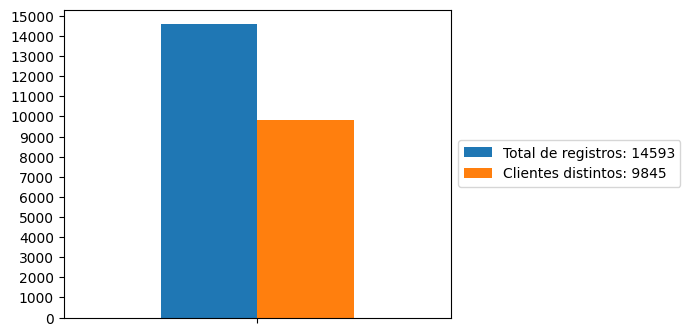

In [11]:
grafico_clientes_distintos(renda)

Podemos verificar que de fato foram removidos **407** registros duplicados da base de dados, mas o problema dos clientes duplicados ainda persiste, permanecendo os mesmos **9845** clientes únicos que tínhamos antes da remoção dos duplicados.

Isso indica que ainda existem dados duplicados na base e alguma outra variável não está proporcionando a distinção dos dados.

Abaixo realizamos um agrupamento dos dados pela variável `id_cliente` com intuito de verificar qual variável por cliente possui mais de um valor.

In [12]:
agrupamento_cliente = renda.groupby('id_cliente').nunique()
agrupamento_cliente.head(10).style.highlight_between(left=2)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
id_cliente,,,,,,,,,,,,,
1,2,1,1,1,1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1
8,3,1,1,1,1,1,1,1,1,1,1,1,1
9,3,1,1,1,1,1,2,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1,1,1,1,1,1


Analisando o agrupamento dos dados, apenas com os 10 primeiros registros, podemos verificar que existem clientes com datas de coletas de dados (`data_ref`) e registros de educação diferentes, sem variações nas outras variáveis para o mesmo cliente.

Abaixo realizamos uma busca por outras variáveis que também possam ter dados diferentes por cliente.



In [13]:
c = ''
for coluna in agrupamento_cliente.columns:
    if agrupamento_cliente[agrupamento_cliente[coluna] > 1].shape[0] > 1:
        c = c + "<br>- " + coluna
        
imprimir(f'Colunas com dados diferentes para o mesmo cliente:{c}')

<br>

Acima podemos comprovar que um único cliente possui dados diferentes na coluna `data_ref` e `educacao`.

Importante ressaltar que, no caso da data de coleta, poderíamos até mesmo imaginar que os dados do mesmo cliente foram coletados em dias diferentes, mas seria irrelevante, pois todas as outras variáveis do cliente não possuem alteração entre os dias.

Abaixo será feito o tratamento dessas duas variáveis separadamente.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="VarEducacao"></a>
                Variável: educacao
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Abaixo realizamos uma análise para entender a natureza da duplicidade pela variável educação em relação ao ID do cliente. Primeiramente agrupamos todos os clientes que possuem pelo menos dois valores diferentes na variável.

Com base nesse agrupamento, criamos um novo DataFrame filtrando esses valores.

Depois, agrupamos pela variável educação para saber quantos clientes distintos cada valor possui.

In [14]:
# novo DataFrame, filtrando todos os cliente com pelo menos 2 valores diferentes na variável educação 
df_educacao = renda.groupby('id_cliente').filter(lambda x: x['educacao'].nunique() > 1)

# agrupando por educação, para saber quantos clientes distintos cada valor possui
df_educacao[['id_cliente', 'educacao']].groupby('educacao').nunique()

,id_cliente
educacao,
Secundário,602
Superior completo,602


Através da análise acima podemos comprovar que existem 602 clientes na nossa base com 2 registros de educação diferentes: Secundário e Superior completo.

A tabela abaixo exemplifica nosso problema, exibindo os dados do cliente com ID número 9. Ele possui 3 registros na base de dados. Se desconsiderarmos as colunas `data_ref` e `educacao`, todas as outras colunas possuem os mesmos valores.

In [15]:
renda[renda['id_cliente'] == 9]

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
836,2015-01-01,9,F,False,True,1,Assalariado,Secundário,Solteiro,Casa,30,4.438356,2.0,1929.1
2846,2015-03-01,9,F,False,True,1,Assalariado,Secundário,Solteiro,Casa,30,4.438356,2.0,1929.1
13451,2016-02-01,9,F,False,True,1,Assalariado,Superior completo,Solteiro,Casa,30,4.438356,2.0,1929.1


<br>

Não iremos descartar todos esses registros da nossa base original. Vamos selecionar um critério para determinar se iremos excluir os registros cujo valor é Secundário ou Superior completo.

Por exemplo, podemos verificar na nossa base original quantos clientes distintos temos para cada valor da variável educação. 

Para isso, podemos excluir dessa análise os clientes que possuem dados duplicados para essa variável.

In [16]:
# criamos uma lista apenas com as IDs dos clientes que possuem 2 valores diferentes na variável educação
lista_clientes_duplicados = list(df_educacao['id_cliente'])

# criamos um DataFrame apenas com os clientes que não estão nessa lista
df_sem_duplicados = renda[~renda['id_cliente'].isin(lista_clientes_duplicados)]

# verificamos quantos clientes distintos existem para cada valor da variável educação
df_sem_duplicados[['id_cliente', 'educacao']].groupby('educacao').nunique()

,id_cliente
educacao,
Primário,107
Pós graduação,14
Secundário,5522
Superior completo,3219
Superior incompleto,381


Excluindo os clientes com dados divergentes, podemos verificar que **Secundário** possui mais registros em comparação com **Superior completo**.

Assim, para manter uma quantidade de dados equilibrada nessa variável, vamos remover da nossa base original os registros duplicados dos clientes cujo valor na variável educação é **Secundário**.

In [17]:
# filtrando os clientes com 2 valores diferentes na variável educação e que possuem o valor 'Secundário'
remover = renda[(renda['id_cliente'].isin(lista_clientes_duplicados)) & (renda['educacao'] == 'Secundário')]

# removendo esses registros na base original, deixando apenas os registros com valor 'Superior completo'
renda.drop(remover.index, inplace=True)

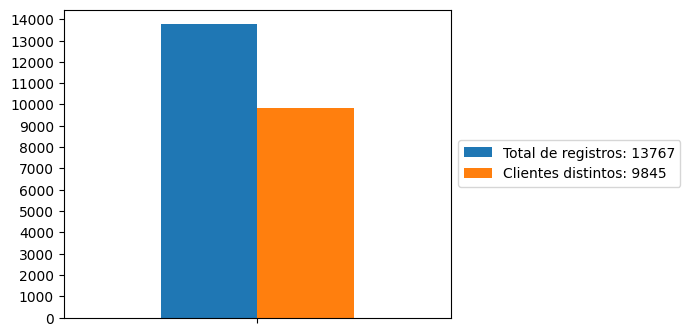

In [18]:
grafico_clientes_distintos(renda)

Podemos verificar que ainda existem dados duplicados frente a quantidade de clientes distintos. Isso se deve a variável `data_ref`, que será tratada separadamente a seguir.



<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="VarDataRef"></a>
                Variável: data_ref
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Conforme verificamos anteriormente ao analisarmos a ID do cliente, abaixo estamos removendo os dados duplicados por data de coleta, mantendo apenas o primeiro registro.

In [19]:
# recuperamos a lista de colunas do DataFrame
colunas = list(renda.columns)

# removemos a coluna data_ref da lista, para criar um "subset" para o método drop_duplicates
# assim podemos manter apenas 1 registro por cliente e data
colunas.remove('data_ref')

renda.drop_duplicates(subset=colunas, inplace=True)

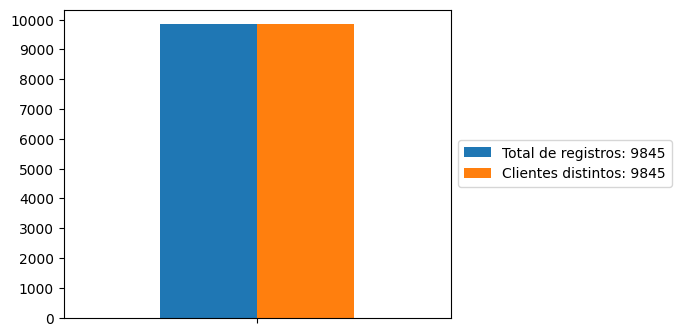

In [20]:
grafico_clientes_distintos(renda)

No gráfico acima podemos verificar que agora temos registros distintos por cliente na nossa base. Com relação a data de coleta, vale lembrar que excluindo essa coluna da base de dados, todas as outras variáveis para um único cliente eram idênticas.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="VarTempoEmp"></a>
                Variável: tempo_emprego
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

O relatório gerado pelo Pandas Profiling aponta uma grande quantidade de dados faltantes nessa variável. Abaixo realizamos uma análise para entender ausência desses dados.

Criamos um novo DataFrame apenas com os registros cujo valor da variável não está definido. Podemos usar esse subconjunto de dados para analisarmos as variáveis relacionadas a falta desse dado.

In [21]:
df_tempo_emprego = renda[renda['tempo_emprego'].isna()]

Tempo de emprego pode ser considerada uma variável relacionada a renda do cliente, que no nosso caso pode ser a fonte de renda (`tipo_renda`) ou a própria renda em si. Também pode estar relacionado a uma condição temporária de desemprego.

Abaixo criamos 2 gráficos para analisarmos a idade, renda e fonte de renda do cliente considerando apenas os dados cujo tempo de emprego não está definido.

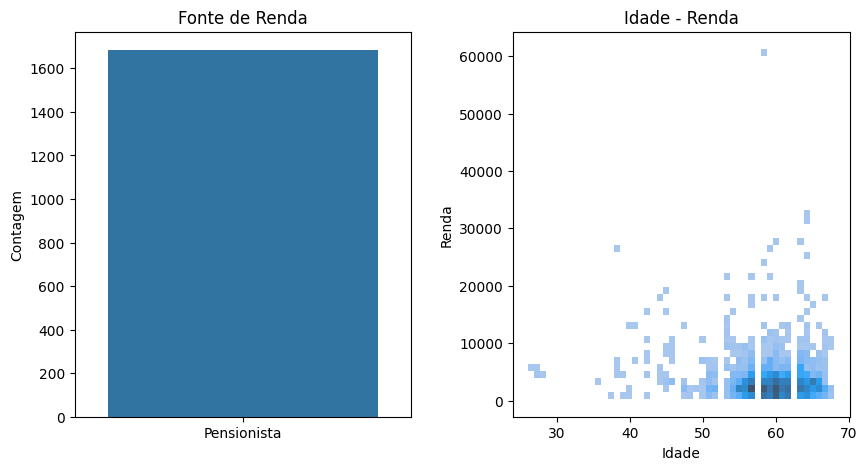

In [22]:
plt.rc('figure', figsize=(10, 5))
fig, axes = plt.subplots(1, 2)

sns.countplot(ax = axes[0], x='tipo_renda', data=df_tempo_emprego)
sns.histplot(ax = axes[1], x='idade', y='renda', bins=50, data=df_tempo_emprego)

axes[0].set_title('Fonte de Renda')
axes[0].set(xlabel='', ylabel='Contagem')

axes[1].set_title('Idade - Renda')
axes[1].set(xlabel='Idade', ylabel='Renda')
plt.subplots_adjust(wspace = 0.3)

Como podemos observar nos gráficos, 100% dos registros <u>com tempo de emprego não definido</u> está relacionada a pensionistas. A maioria possui mais de 50 anos, o que pode indicar casos de aposentados.

Casos de aposentados e pensionistas justificam a ausência do tempo de emprego. Nesse caso podemos preencher os dados faltantes nessa variável com 0.

In [23]:
renda.fillna({"tempo_emprego": 0}, inplace=True)

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="VarTipoRend"></a>
                Variável: tipo_renda
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

O relatório gerado pelo Pandas Profiling aponta uma quantidade extremamente baixa de dados para a variável `tipo_renda` cujo valor é **Bolsista**, em comparação com a quantidade total de dados.

Abaixo criamos um novo DataFrama epanas com os dados dos Bolsistas para uma avaliação mais detalhada.

In [24]:
# DataFrame apenas com os dados dos Bolsistas
df_bolsista = renda[renda['tipo_renda'] == 'Bolsista']

# contagem de dados por tipo de renda
pd.DataFrame(renda['tipo_renda'].value_counts())

,tipo_renda
Assalariado,5054
Empresário,2259
Pensionista,1689
Servidor público,836
Bolsista,7


In [25]:
df_bolsista

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
1519,2015-02-01,594,F,False,True,0,Bolsista,Superior completo,Casado,Casa,51,10.69589,2.0,3335.97
2215,2015-03-01,597,F,False,True,0,Bolsista,Superior completo,Casado,Casa,51,10.69589,2.0,5164.80
6297,2015-07-01,593,F,False,True,0,Bolsista,Superior completo,Casado,Casa,51,10.69589,2.0,4223.72
8095,2015-09-01,595,F,False,True,0,Bolsista,Superior completo,Casado,Casa,51,10.69589,2.0,4059.21
9468,2015-10-01,590,F,False,True,0,Bolsista,Superior completo,Casado,Casa,51,10.69589,2.0,3705.06
13116,2016-02-01,592,F,False,True,0,Bolsista,Superior completo,Casado,Casa,51,10.69589,2.0,7176.08
13780,2016-02-01,591,F,False,True,0,Bolsista,Superior completo,Casado,Casa,51,10.69589,2.0,8158.59


Analisando os dados dos Bolsista usando a tabela acima, podemos observar que <u>**todos os clientes possuem as mesmas características**</u> abaixo:
- Todos são do sexo feminino
- Todos possuem veiculo e imóvel
- Todos não têm filhos
- Todos possuem ensino Superior completo
- Todos são casados
- Todos moram em casas
- Todos possuem 51 anos
- Todos possuem **exatamente** o mesmo tempo de emprego
- Todos moram com mais uma pessoa na residência, provavelmente o cônjuge.

As únicas diferenças nas variáveis relacionadas aos bolsistas são a renda, ID do cliente e data de coleta.

Por ser uma quantidade muito pequena de dados frente ao todo e por serem dados com as características citadas anteriormente, a decisão será por descartar os dados cujo valor da variável `tipo_renda` é igual a **Bolsista**

Com esses dados, não seria possível prever a renda de um Bolsista homem, uma mulher solteira ou qualquer pessoa que não tenha 51 anos, por exemplo.

<font color="red">Seria muita coincidência? 7 pessoas diferentes com todos esses dados iguais? Ou poderia ser um pequeno equívoco na confecção dessa base de dados para o exercício do curso?</font>

In [26]:
renda.drop(renda[renda['tipo_renda'] == 'Bolsista'].index, inplace=True)

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="VarQtdPess"></a>
                Variável: qt_pessoas_residencia
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Existem alguns registros nessa variável com quantidade maior ou igual a 7. Vamos analisar abaixo esses dados.

In [27]:
renda[renda['qt_pessoas_residencia'] >= 7]

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
697,2015-01-01,13556,F,False,False,7,Assalariado,Secundário,Casado,Casa,37,4.517808,9.0,2480.08
3039,2015-04-01,13557,F,False,False,7,Assalariado,Secundário,Casado,Casa,37,4.517808,9.0,1531.68
3437,2015-04-01,6791,M,True,True,14,Assalariado,Secundário,Separado,Casa,48,4.627397,15.0,2722.59
6629,2015-07-01,6790,M,True,True,14,Assalariado,Secundário,Separado,Casa,48,4.627397,15.0,2972.42
8864,2015-09-01,14523,M,True,True,5,Assalariado,Secundário,Casado,Comunitário,31,7.471233,7.0,7269.87


Podemos verificar na tabela acima que, a exemplo do que ocorreu na variável `tipo_renda`, também temos registros duplicados na variável `qt_pessoas_residencia`. 

Podemos observar que o 1º e 2º segundo registros são iguais, assim como o 3º e 4º registros. Todos os dados são iguais exceto `data_ref`, `id_cliente` e `renda`.

Por se tratar de dados duplicados e por ser uma pequna amostra, esses quatro registros serão excluídos da base.

Temos também o 5º registro referente a um cliente com tipo de renda assalariado, com nível de educação secundário, casado, com tipo de residência comunitário. Vamos verificar se existe mais algum cliente com essas características na nossa base.

In [28]:
(renda[
    (renda['tipo_renda'] == 'Assalariado') &
    (renda['educacao'] == 'Secundário') &
    (renda['estado_civil'] == 'Casado') &
    (renda['tipo_residencia'] == 'Comunitário')
])

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
4136,2015-05-01,10336,F,False,True,0,Assalariado,Secundário,Casado,Comunitário,41,15.476712,2.0,5322.37
8864,2015-09-01,14523,M,True,True,5,Assalariado,Secundário,Casado,Comunitário,31,7.471233,7.0,7269.87


Existe outro registro de perfil semelhante, porém a renda e a quantidade de pessoas na mesma residência são inferiores.

Assim, por existirem dados duplicados e por se tratar de uma quantidade pequena de dados, esses 5 registros serão removidos da base.



In [29]:
renda.drop(renda[renda['qt_pessoas_residencia'] >= 7].index, inplace=True)

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="VarQtdFil"></a>
                Variável: qtd_filhos
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Vamos analisar o perfil dos registros com quantidade de filhos maior ou igual a 4

In [30]:
renda[renda['qtd_filhos']>=4].sort_values('qtd_filhos', ascending=False)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
7955,2015-08-01,3414,F,False,True,5,Assalariado,Secundário,Separado,Casa,42,1.172603,6.0,3296.73
562,2015-01-01,7614,F,False,False,4,Empresário,Secundário,Casado,Casa,36,0.767123,6.0,1548.70
1742,2015-02-01,13259,F,False,True,4,Assalariado,Secundário,Casado,Casa,34,4.350685,6.0,592.03
2816,2015-03-01,12965,F,False,True,4,Empresário,Secundário,Casado,Casa,47,20.309589,6.0,13624.19
3072,2015-04-01,973,M,True,True,4,Assalariado,Secundário,Casado,Casa,38,1.098630,6.0,2442.88
3753,2015-04-01,15348,F,True,False,4,Servidor público,Secundário,Casado,Casa,39,5.035616,6.0,755.63
4110,2015-05-01,7769,F,True,True,4,Assalariado,Secundário,Casado,Casa,37,11.421918,6.0,15288.14
4915,2015-05-01,2546,M,True,False,4,Empresário,Secundário,Casado,Casa,41,7.063014,6.0,6264.02
6810,2015-07-01,15310,F,True,False,4,Assalariado,Superior incompleto,Casado,Casa,34,12.041096,6.0,4595.96
7182,2015-08-01,13260,F,False,True,4,Assalariado,Secundário,Casado,Casa,34,4.350685,6.0,5332.19


Podemos verificar que só temos 1 registro com a quantidade de filhos igual a 5. Por se tratar de apenas 1 registro, vamos removê-lo da base.



In [31]:
renda.drop(renda[renda['qtd_filhos'] == 5].index, inplace=True)

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="VarRenda"></a>
                Variável: renda
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

De acordo com o relatório Pandas Profiling, podemos ter alguns outliers na variável renda. Também podemos observar essa informação no boxplot abaixo.

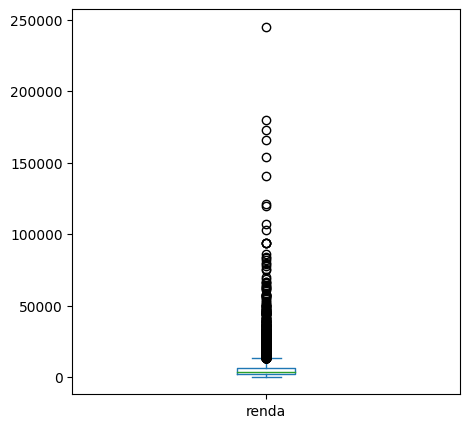

In [32]:
_ = renda['renda'].plot.box(figsize=(5, 5))

Abaixo realizamos um filtro nos dados cujo o valor da variável renda está fora do intervalo interquartil.

In [33]:
Q1 = renda['renda'].quantile(0.25)
Q3 = renda['renda'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

if renda['renda'].max() < lim_sup:
    lim_sup = renda["renda"].max()

if renda['renda'].min() > lim_inf:
    lim_inf = renda["renda"].min()

outliers = renda.loc[(renda['renda'] < lim_inf) | (renda['renda'] > lim_sup)]

imprimir(f'Quantidade de registros fora do intervalo interquartil: {outliers.shape[0]}')

In [34]:
imprimir(f'Valores do intervalo interquartil: {lim_inf:.2f} - {lim_sup:.2f}')

<br>
Abaixo realizamos uma contagem de clientes por faixa de renda, considerando intervalos de 20.000 Reais

In [35]:
intervalo_renda = renda.copy()
intervalo_renda['intervalo_renda'] = pd.cut(intervalo_renda['renda'], bins=range(0,280000,20000))
intervalo_renda[['id_cliente', 'intervalo_renda']].groupby('intervalo_renda').count().rename(columns={"id_cliente": "quantidade"})

,quantidade
intervalo_renda,
"(0, 20000]",9496
"(20000, 40000]",253
"(40000, 60000]",48
"(60000, 80000]",16
"(80000, 100000]",9
"(100000, 120000]",3
"(120000, 140000]",1
"(140000, 160000]",2
"(160000, 180000]",3


<br>
Podemos ver que existem 797 registros com a renda fora do intervalo interquartil, registros considerados outliers.

Desses, 19 clientes possuem renda superior a 80.000, como podemos observar na tabela acima. Esses casos correspondem a 0,19% da nossa base de dados. Apenas 1 cliente possui renda superior a 240.000 mil. 

Vamos analisar os dados desses 19 clientes ordenados pela maior renda.

In [36]:
outliers[outliers['renda'] >= 80000].sort_values('renda', ascending=False)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
11535,2015-12-01,3122,M,True,False,0,Assalariado,Secundário,Casado,Governamental,58,33.569863,2.0,245141.67
8181,2015-09-01,6611,M,True,False,0,Assalariado,Secundário,Casado,Casa,64,40.786301,2.0,179538.80
5168,2015-06-01,9588,M,True,True,0,Assalariado,Secundário,Casado,Casa,39,20.189041,2.0,172748.39
4458,2015-05-01,9658,M,False,True,0,Assalariado,Secundário,Casado,Casa,60,30.364384,2.0,166223.85
474,2015-01-01,6412,M,False,False,0,Assalariado,Secundário,Casado,Casa,62,26.931507,2.0,154006.23
5413,2015-06-01,6609,M,True,False,0,Assalariado,Secundário,Casado,Casa,64,40.786301,2.0,140482.94
1131,2015-02-01,14602,M,False,True,2,Servidor público,Superior completo,Casado,Casa,35,12.558904,4.0,121348.30
3301,2015-04-01,7863,M,True,True,0,Empresário,Secundário,Casado,Casa,44,22.482192,2.0,119626.38
4007,2015-05-01,15010,M,False,True,0,Assalariado,Secundário,Casado,Casa,43,20.112329,2.0,107414.21
9428,2015-10-01,7725,M,True,True,0,Assalariado,Superior completo,Casado,Casa,51,32.619178,2.0,102641.07


Podemos verificar que existem diversos casos de clientes com nível de educação secundário e assalariado. Esses casos, em função da idade, não é possível afirmar que são outliers. Devemos considerar que a renda pode não representar apenas o salário do cliente, mas também outras fontes de receitas como aplicações financeiras, por exemplo.

O mesmo pode ser aplicado aos outros registros, exceto pelo primeiro registri da tabela.

O registro com maior renda é de um homem, 58 anos, casado, reside em um edifício governamental com outra pessoa, possui renda superior a 245.000 mil, com 33 anos de emprego assalariado. 

Não é possível afirmar, mas poderia ser algum político, de acordo com o tipo de residência. De qualquer forma, acredito que esse caso se trata de um outlier e será excluído da base por se tratar de um caso atípico.

In [37]:
remover = renda[(renda['renda'] >= 240000) & (renda['tipo_residencia'] == 'Governamental')]
renda.drop(remover.index, inplace=True)

In [38]:
imprimir(f'Total de registros na base de dados: {renda.shape[0]}')

Após as tratativas de todas as inconsistências verificadas na análise exploratória de dados pelo relatório do Pandas Profiling, finalizamos com 9831 registros na base, frente aos 15000 iniciais.

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="EntdDadosB"></a>
                Entendimento dos dados - Bivariadas
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Nessa etapa iremos analisar a relação entre duas variáveis ao mesmo tempo. Essa análise é útil para identificar correlações, padrões ou diferenças entre as variáveis que irão nos auxiliar na tomada de decisões para a construção do modelo.

Para a análise das variáveis categorias, iremos utilizar um gráfico do perfil das médias dos grupos, a análise da variância pelo método ANOVA, para testar a igualdade de duas ou mais médias de grupos e um histograma para verificarmos como os grupos estão distribuídos em relação a renda.

A partir desse ponto iremos analisar a <u>renda em escala logarítmica</u>. Para isso, vamos criar uma nova coluna no nossa DataFrame para guardar esse valor.

In [39]:
renda['renda_log'] = np.log(renda['renda'])

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="RendaXRes"></a>
                Renda x Tipo de Residência
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Abaixo criamos um gráfico de perfis de média da renda por tipo de residência.

O objetivo dessa analise é verificar se o tipo de residência é uma variável estatisticamente significante para a avaliação da renda.

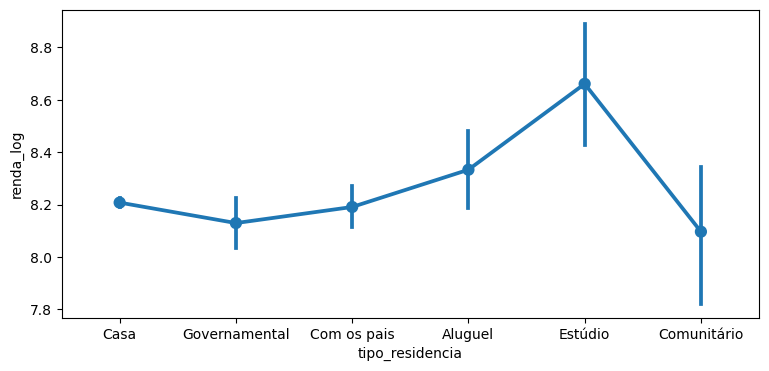

In [40]:
plt.rc('figure', figsize=(9, 4))
_ = sns.pointplot(x="tipo_residencia", y="renda_log", data=renda)

In [41]:
teste_anova('tipo_residencia')

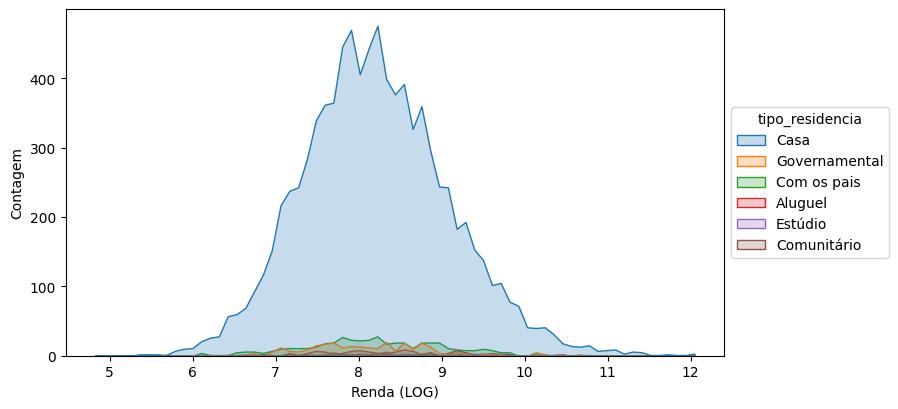

In [42]:
grafico_histplot(renda, 'tipo_residencia')

Analisando o gráfico do perfil das médias poderíamos concluir que o tipo de residência seria uma variável relevante para a análise da renda. Podemos observar que clientes que residem em **estúdio** possuem uma renda superior a média. Em comparação, clientes que residem em edifícios **comunitários** possuem uma renda inferior a média.

Pelo teste de variância dessa variável, obtemos um p-value inferior a 5%.

No entento, podemos observar no histograma um desequilíbrio amostral, tendo a variável **Casa** uma quantidade muito superior de dados em relação as demais. Esse desequilíbrio amostral afeta a precisão dos resultados do ANOVA. Em amostras grandes, mesmo pequenas diferenças podem resultar em p-values muito pequenos, o que pode levar à rejeição da hipótese nula.

Podemos concluir que `tipo_residencia` não é uma variável relevante para a análise da renda.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="RendaXEduc"></a>
                Renda x Educação
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Abaixo criamos um gráfico de perfis de média da renda por nível de educação.

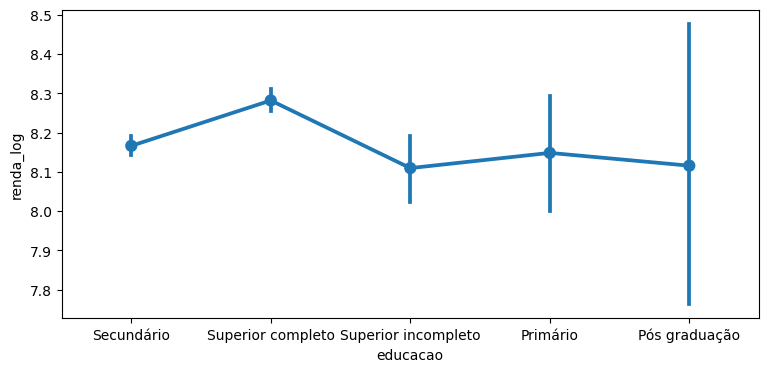

In [43]:
plt.rc('figure', figsize=(9, 4))
_ = sns.pointplot(x="educacao", y="renda_log", data=renda)

Podemos verificar no gráfico acima que existe uma discrepância em pós graduação em relação aos demais. Vamos analisar um pouco mais o perfil dessa variável.

In [44]:
# verificando a quantidade de clientes por nível de educação e também a média de renda, desvio padrão, mínimo e máximo.
renda.groupby('educacao').agg({'id_cliente': 'count', 'renda_log': ['mean', 'min', 'max', 'std']})

id_cliente renda_log                               
                         count      mean       min        max       std
educacao                                                               
Primário                   107  8.148132  6.184911  10.137497  0.794786
Pós graduação               14  8.115562  7.213812   9.369608  0.716082
Secundário                5515  8.166135  4.776684  12.098147  0.883089
Superior completo         3814  8.281662  5.473111  11.706420  0.884457
Superior incompleto        381  8.109404  6.095982  10.569982  0.823191

Na tabela acima verificamos que existem apenas 14 registros de clientes com pós graduação. Podemos pensar em alterar o nível de educação "Pós graduação" para "Superior completo".

Vamos fazer uma simulação em um gráfico de perfis de média realizando essa alteração

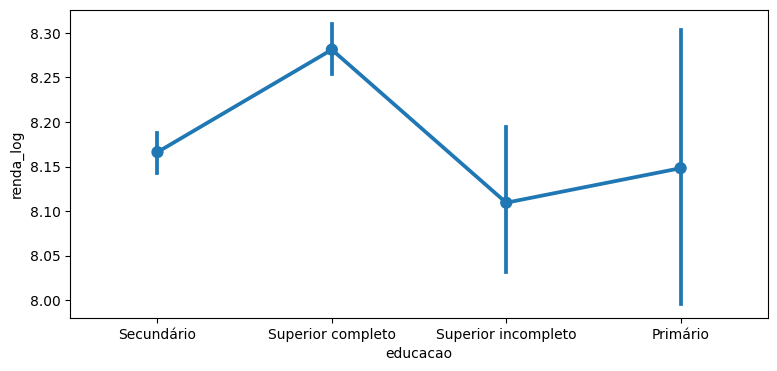

In [45]:
altera_edu = renda.copy()
altera_edu.loc[altera_edu['educacao'] == 'Pós graduação', ['educacao']] = 'Superior completo'
_ = sns.pointplot(x="educacao", y="renda_log", data=altera_edu)

In [46]:
teste_anova('educacao', altera_edu)

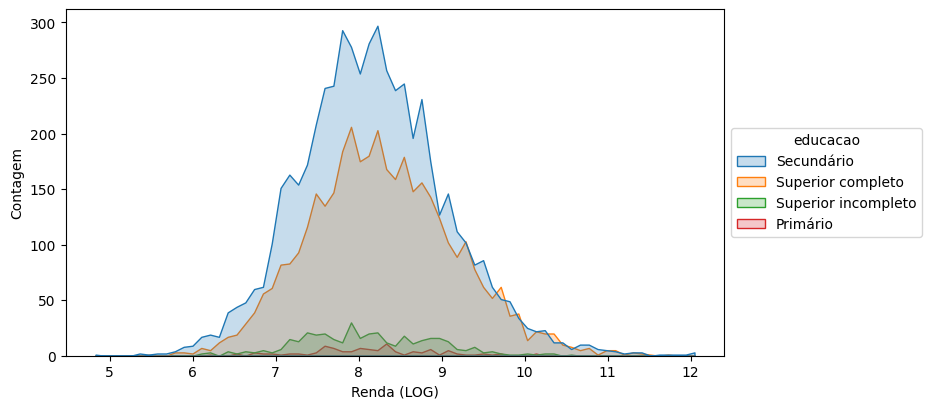

In [47]:
grafico_histplot(altera_edu, 'educacao')

No histograma acima podemos novamente verificar um desequilíbrio amostral relacionado ao nível **secundário** e **superior completo**. A amplitude do nível **secundário**, por exemplo, engloba todos os outros níveis da variável `educacao`. Apesar do p-value no método anova apresentar um valor abaixo de 5%, podemos ver que ele não está correto devido a magnitude dessas diferenças.

Podemos concluir que `educacao` não é uma variável relevante para a análise da renda.

Se não podemos usar essa variável devido aos problemas verificados anteriormente, será que poderíamos criar uma nova variável para verificar se o cliente possui ou não curso superior? Seria possível utilizar essa informação na avaliação da renda? Vamos fazer essa simulação abaixo.

In [48]:
# cria uma nova coluna indicando se o cliente possui ou não curso superior (TRUE / FALSE)
altera_edu['curso_superior'] = np.where(altera_edu['educacao'].isin(['Superior completo']), True, False)

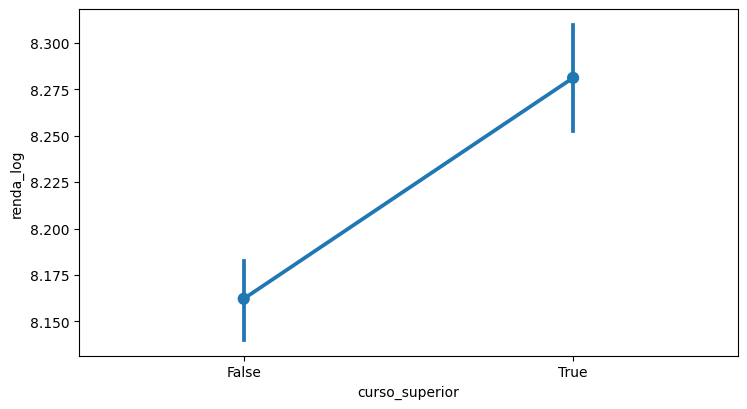

In [49]:
_ = sns.pointplot(x="curso_superior", y="renda_log", data=altera_edu)

Podemos verificar que há uma diferença de renda entre aqueles que possuem curso superior em comparação com aqueles que não possuem.


Podemos concluir que `curso_superior` pode ser uma variável relevante para a análise da renda.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="RendaXTpR"></a>
                Renda x Tipo renda
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

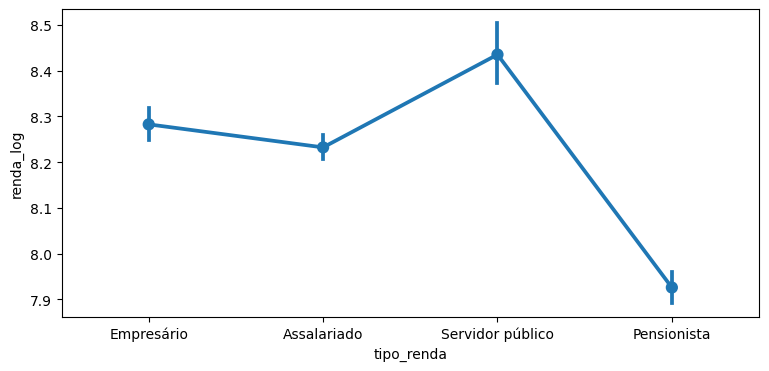

In [50]:
plt.rc('figure', figsize=(9, 4))
_ = sns.pointplot(x="tipo_renda", y="renda_log", data=renda)

In [51]:
teste_anova('tipo_renda')

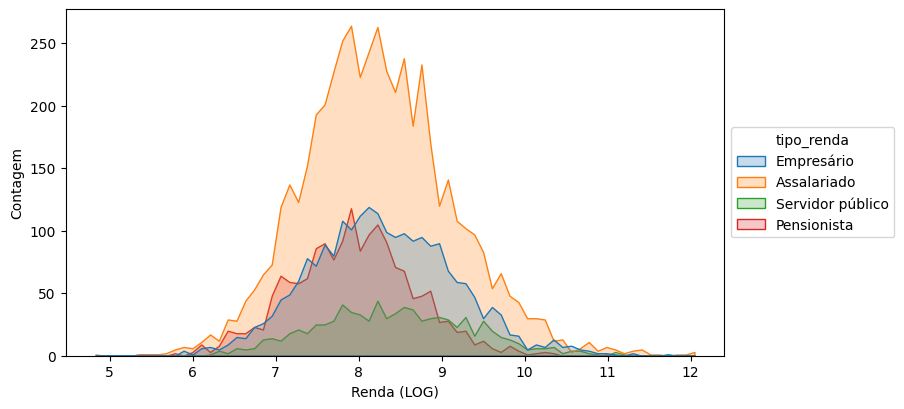

In [52]:
grafico_histplot(renda, 'tipo_renda')

Na nossa base, servidores públicos possuem uma renda superior a média e também em comparação com os outros tipos de renda.

Vale destacar também o baixo nível de renda dos pensionistas em relação a média.

No gráfico do perfil das médias podemos verificar que os grupos possuem médias distintas. O p-valor é igual a zero. No histograma, não há uma diferença amostral significante comparando o tipo **Assalariado** com os demais. Também podemos ver uma clara diferença entre os tipos **Empresário**, **Servidor público** e **Pensionista**.

Podemos concluir que `tipo_renda` é sim uma variável relevante para a análise da renda.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="RendaXIdSex"></a>
                Renda x Idade x Sexo
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Verificarmos se a variável sexo estatisticamente relevante.

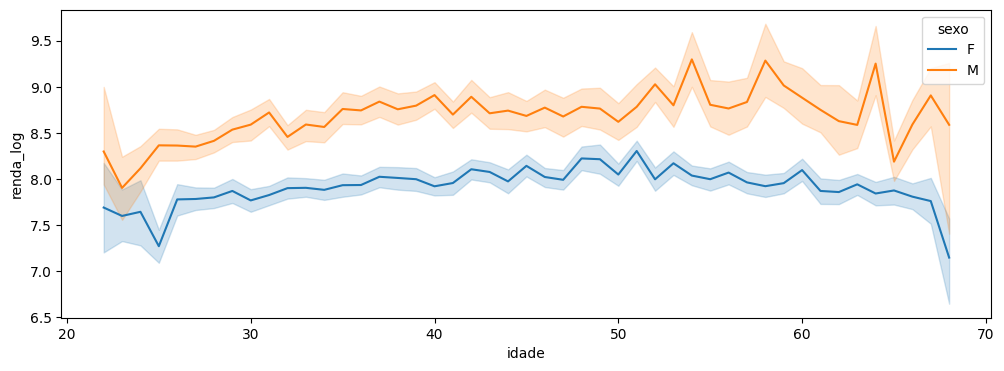

In [53]:
plt.rc('figure', figsize=(12, 4))
_ = sns.lineplot(data=renda, x="idade", y="renda_log", hue='sexo')

No gráfico acima podemos verificar que as mulheres possuem uma renda inferior em comparação com os homens. Utilizando a idade no eixo X, podemos verificar também que essa diferença ocorrem em todas as idades.

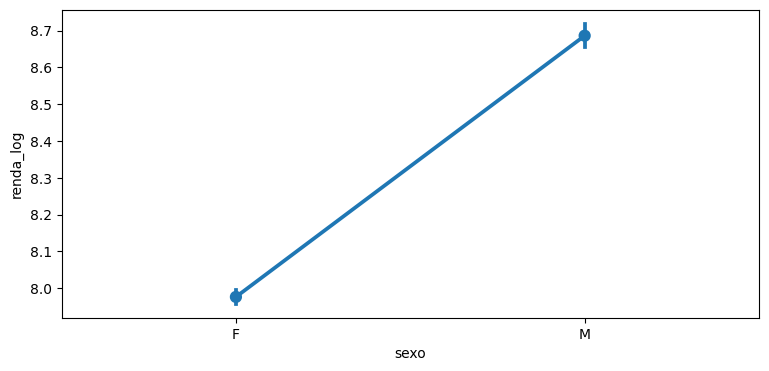

In [54]:
plt.rc('figure', figsize=(9, 4))
_ = sns.pointplot(x="sexo", y="renda_log", data=renda)

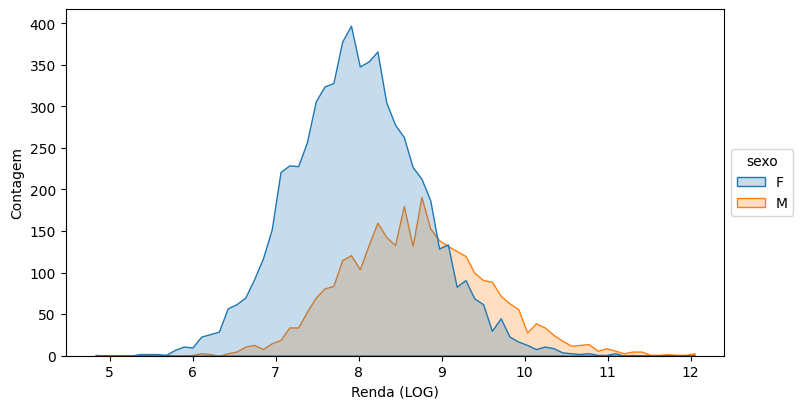

In [55]:
grafico_histplot(renda, 'sexo')

Utilizando o gráfico de perfis de média e o histograma, podemos comprovar essa desigualdade.

Podemos concluir que `sexo` é sim uma variável relevante para a análise da renda.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="RendaXIdade"></a>
                Renda x Idade
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

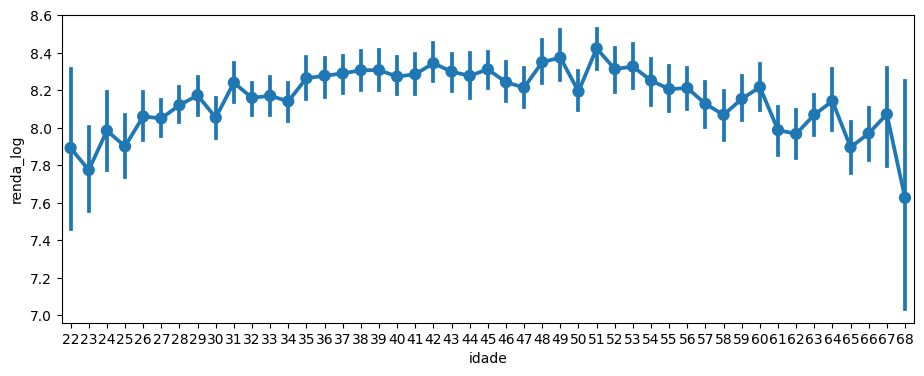

In [56]:
plt.rc('figure', figsize=(11, 4))
_ = sns.pointplot(x="idade", y="renda_log", data=renda)

Analisando o perfil das médias de renda das idades, podemos verificar que existe uma distorção aos 22 e 68 anos. A média de renda se mantém entre 35 e 45 anos.

Podemos concluir que a idade por si só não explica a renda. Talvez podemos usar a idade para definir a faixa etária dos clientes e utilizar essa informação para analisar a renda. Vamos fazer essa simulação abaixo.

Segundo a lei que trata do Estatuto da Juventude, podemos classificar como **jovem** uma pessoa com idade entre 15 e 29 anos de idade. 

Já com base na lei que trata do Estatuto do Idoso, podemos classificar como **idoso** uma pessoa com idade igual ou superior a 60 anos.

Por exclusão, podemos classificar como **adulto** uma pessoa com idade entre 30 e 59 anos.

Segue o link das duas leis citadas anteriormente como fonte de consulta:
- Estatuto da Juventude: https://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12852.htm
- Estatuto do Idoso: https://www.planalto.gov.br/ccivil_03/leis/2003/l10.741.htm

In [57]:
# função para criar uma coluna referente a faixa etária
def definir_faixa_etaria(df: pd.DataFrame) -> None:
    df['faixa_etaria'] = np.where(df['idade'] <= 29, 'Jovem', np.where(df['idade'] >= 60, 'Idoso', 'Adulto'))
    df['faixa_etaria'] = np.where(df['tipo_renda'] == 'Pensionista', 'Pensionista', df['faixa_etaria'])

In [58]:
# cria uma cópia do DataFrame para realizar essa simulação
df_idade = renda.copy()
definir_faixa_etaria(df_idade)

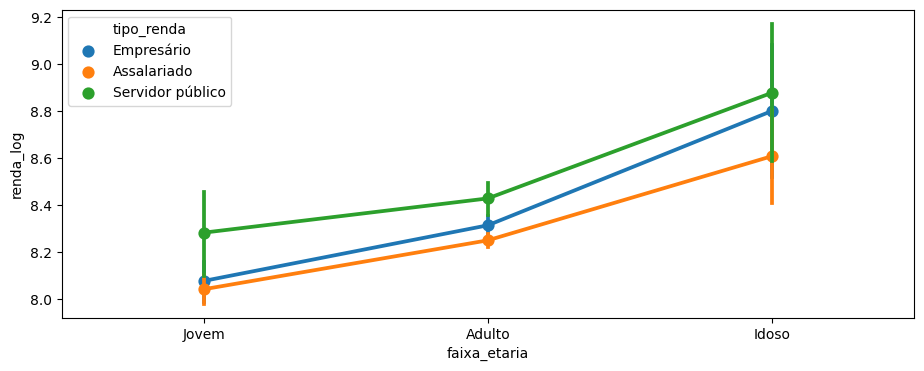

In [59]:
plt.rc('figure', figsize=(11, 4))
_ = sns.pointplot(x='faixa_etaria', y="renda_log", data=df_idade[df_idade['tipo_renda'] != 'Pensionista'], hue='tipo_renda')

O gráfico acima apresenta o perfil das médias por faixa etária e tipo de renda dos clientes da base de dados. Podemos verificar que de fato existe uma diferença de renda entre as faixas.

Vale observar que os pensionistas não foram considerados nessa classificação por terem um renda fixa, a pensão que recebem. Essa não é influenciada por nenhuma variável.

Podemos concluir que `faixa_etaria` pode ser uma variável relevante para a análise da renda.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="RendaXPosIm"></a>
                Renda x Posse de imóvel x Tipo de Residência
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Vamos verificar se a variável posse de imóvel é estatisticamente relevante. Para isso, devemos considerar também o tipo de residência. 

Verificamos anteriormente que alguns clientes moram de aluguel, mas esses também podem possuir imóvel.

Abaixo criamos um perfil de médias sobre a variável posse de imóvel apenas de quem mora de aluguel.

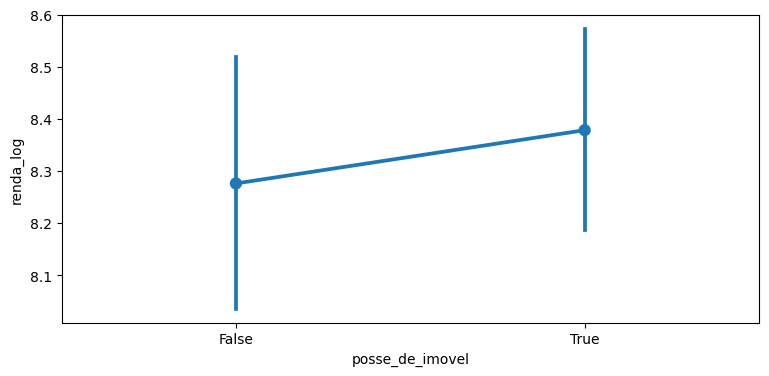

In [60]:
plt.rc('figure', figsize=(9, 4))
_ = sns.pointplot(data=renda[renda['tipo_residencia']=='Aluguel'], x="posse_de_imovel", y="renda_log")

Aqueles que moram de aluguel e possuem um imóvel poderiam ter uma renda mais alta, porque poderiam usar o imóvel como uma fonte de renda. Olhando o gráfico acima, não parece ser o caso.

Com base nessa informação, vamos criar um perfil de média da renda para aqueles que possuem ou não imóvel.

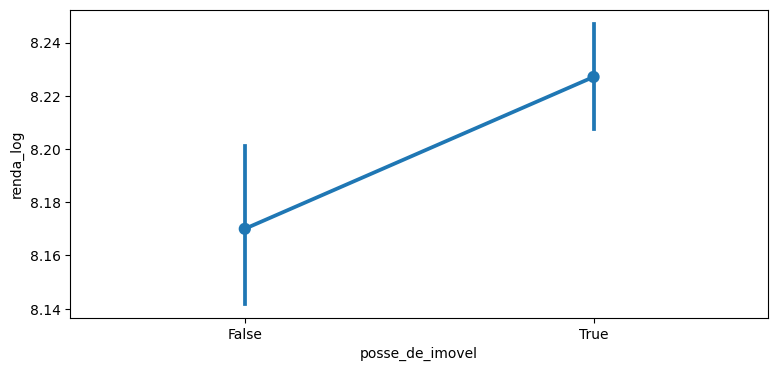

In [61]:
_ = sns.pointplot(data=renda, x="posse_de_imovel", y="renda_log")

In [62]:
teste_anova('posse_de_imovel')

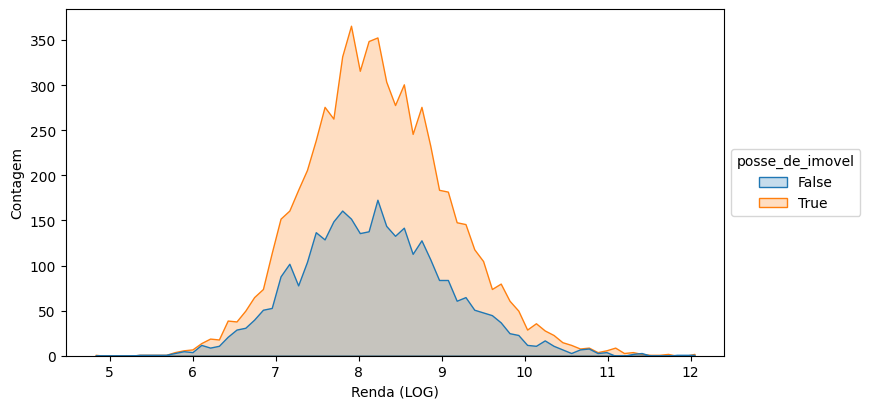

In [63]:
grafico_histplot(renda, 'posse_de_imovel')

O método anova possui um p-value para essa variável inferior a 5%. Podemos observar que não há uma diferença amostral significante entre os 2 grupos. No gráfico do perfil das médias podemos observar que os 2 grupos possuem médias distintas.

Podemos concluir que `posse_de_imovel` é sim uma variável relevante para a análise da renda.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="RendaXPosV"></a>
                Renda x Posse de Veículo 
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Abaixo criamos um gráfico de perfis de média para a variável posse de veículo com fator de confiança de 100%.

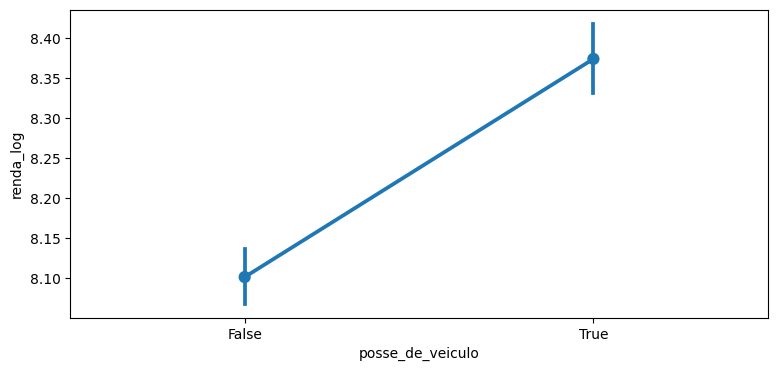

In [64]:
plt.rc('figure', figsize=(9, 4))
_ = sns.pointplot(data=renda, x="posse_de_veiculo", y="renda_log", errorbar=('ci', 100))

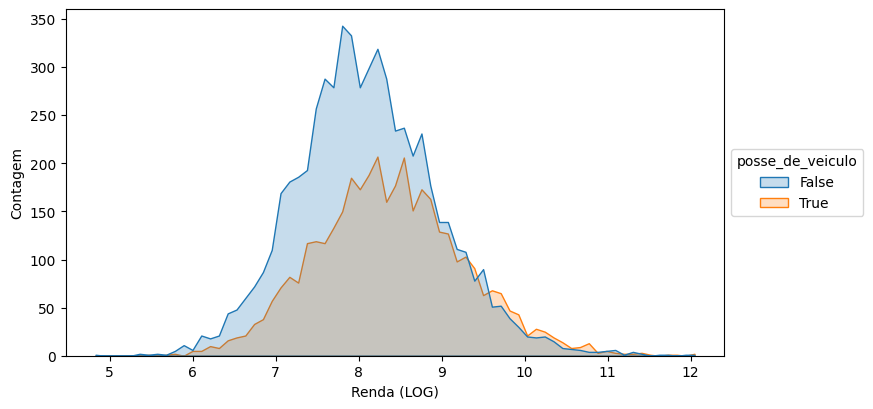

In [65]:
grafico_histplot(renda, 'posse_de_veiculo')

Podemos concluir que `posse_de_veiculo` é sim uma variável relevante para a análise da renda.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="RendaXQtdFP"></a>
                Renda x Qtd. Filhos x Qtd. pessoas na residência 
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Antes de analisarmos a renda, vamos analisar se existe alguma relação entre a quantidade de filhos e a quantidade de pessoas que moram na mesma residencia.

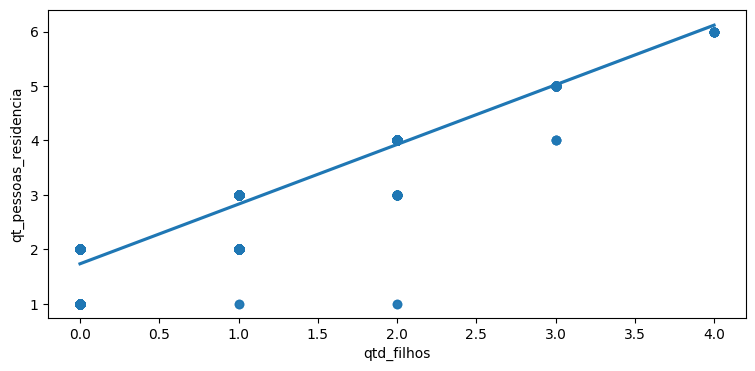

In [66]:
plt.rc('figure', figsize=(9, 4))
_ = sns.regplot(data=renda, x="qtd_filhos", y="qt_pessoas_residencia")

No gráfico de regressão acima podemos verificar que existe sim uma relação entre essas variáveis. Quanto maior a quantidade de filhos, mais pessoas moram na mesma residência.

Agora vamos verificar essas duas variáveis separadamente frente a renda. Para isso criamos o gráfico de perfis de média abaixo.



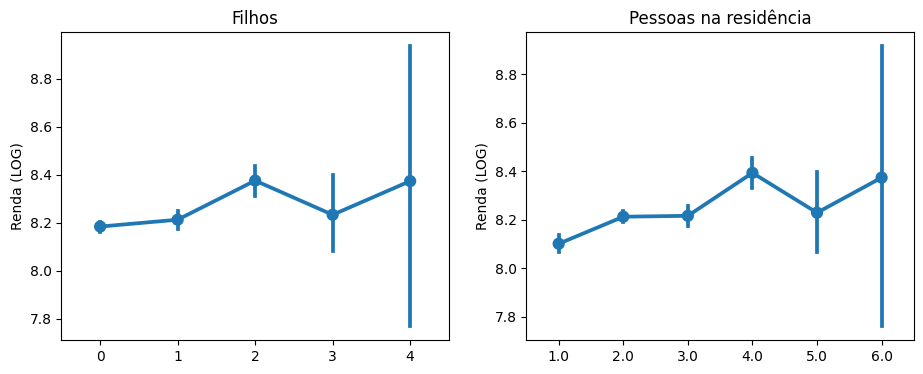

In [67]:
plt.rc('figure', figsize=(11, 4))
fig, axes = plt.subplots(1, 2)

sns.pointplot(ax = axes[0], data=renda, y='renda_log', x='qtd_filhos')
sns.pointplot(ax = axes[1], data=renda, y='renda_log', x='qt_pessoas_residencia')

_ = axes[0].set_title('Filhos')
_ = axes[0].set(xlabel='', ylabel='Renda (LOG)')

_ = axes[1].set_title('Pessoas na residência')
_ = axes[1].set(xlabel='', ylabel='Renda (LOG)')

Podemos observar que o perfil de médias se mantém praticamente o mesmo padrão entre as duas variáveis. Podemos verificar também uma grande dispersão referente aqueles que possuem 4 filhos.

No gráfico de regressão anterior, podemos ver que aqueles com 4 filhos moram em uma residência com 6 pessoas. Provavelmente são os pais.

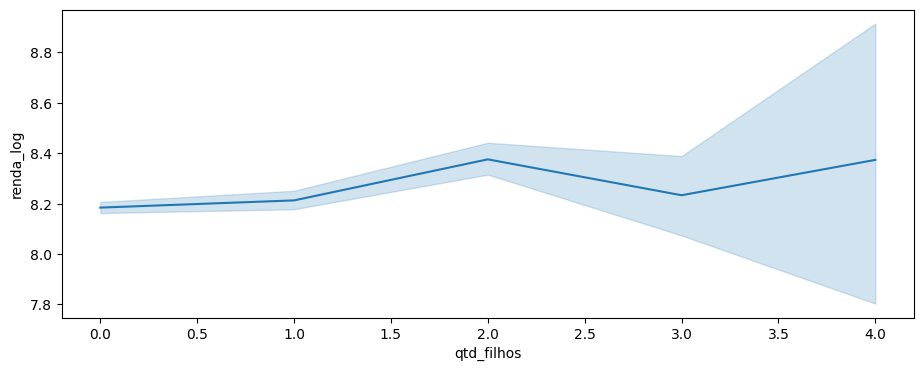

In [68]:
_ = sns.lineplot(data=renda, x="qtd_filhos", y="renda_log")

No gráfico acima podemos ver que a renda para quem tem até 4 filhos gira em torno da média, mas a variação é muito grande para quem tem 4 filhos.


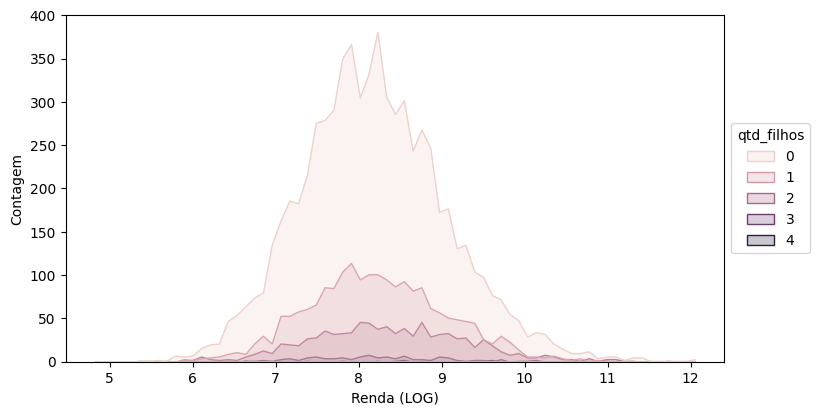

In [69]:
grafico_histplot(renda, 'qtd_filhos')

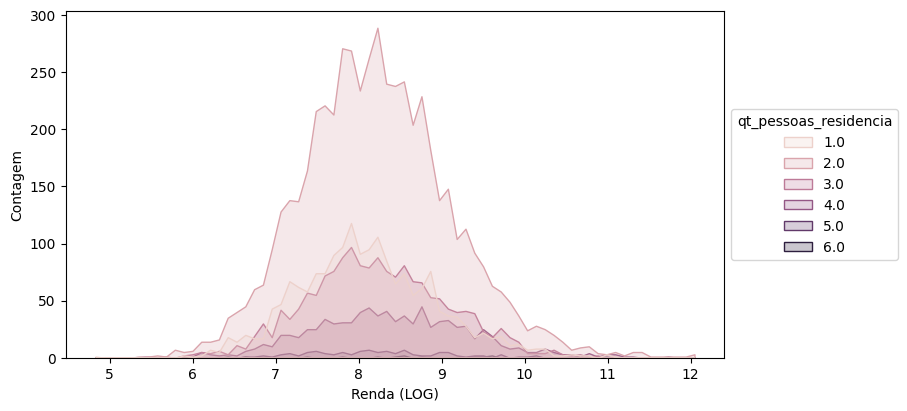

In [70]:
grafico_histplot(renda, 'qt_pessoas_residencia')

Podemos verificar pelo histograma uma diferença amostral significante entre os grupos da variável `qtd_filhos` e `qt_pessoas_residencia`. 

Podemos concluir que `qtd_filhos` e `qt_pessoas_residencia` não são variáveis relevantes para a análise da renda.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="RendaXEstC"></a>
                Renda x Estado Civil
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

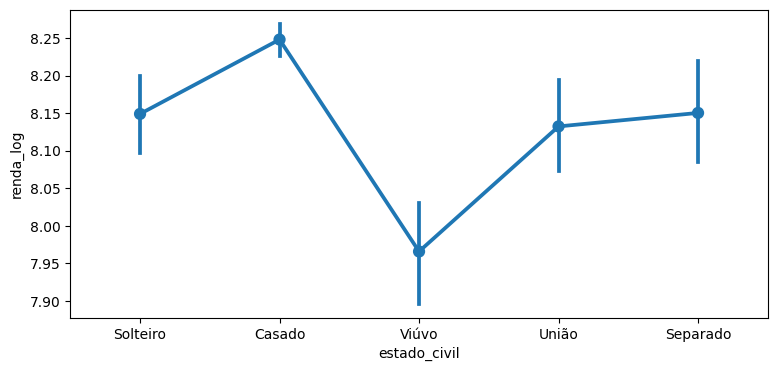

In [71]:
plt.rc('figure', figsize=(9, 4))
_ = sns.pointplot(x="estado_civil", y="renda_log", data=renda)

Se considerarmos apenas solteiros, união estável e separados, podemos dizer que a variável não seria estatisticamente relevante. Poderíamos considerar que união estável como casado e separado como solteiro? Vamos fazer essa simulação abaixo para verificar se teremos alguma alteração nos perfis de média.

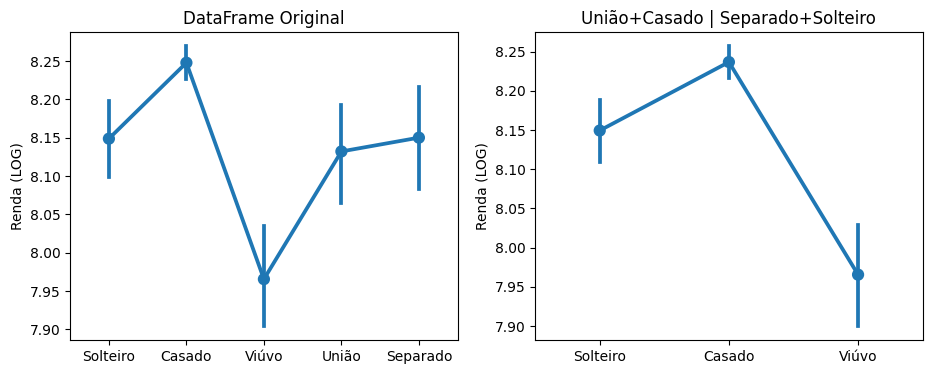

In [72]:
ec = renda.copy()
ec.loc[ ec['estado_civil'] == 'União', ['estado_civil'] ] = 'Casado'
ec.loc[ ec['estado_civil'] == 'Separado', ['estado_civil'] ] = 'Solteiro'

plt.rc('figure', figsize=(11, 4))
fig, axes = plt.subplots(1, 2)

_ = sns.pointplot(ax = axes[0], data=renda, y='renda_log', x='estado_civil')
_ = sns.pointplot(ax = axes[1], data=ec, y='renda_log', x='estado_civil')

_ = axes[0].set_title('DataFrame Original')
_ = axes[0].set(xlabel='', ylabel='Renda (LOG)')

_ = axes[1].set_title('União+Casado | Separado+Solteiro')
_ = axes[1].set(xlabel='', ylabel='Renda (LOG)')

Na simulação acima, representada no gráfico do lado direito, agrupamos alteramos o estado civil de quem tinha união estável para casado e separado para solteiro. Podemos verificar entre o antes e depois que o perfil de média entre solteiros, casados e viúvos praticamente não se alterou.

In [73]:
teste_anova('estado_civil', ec)

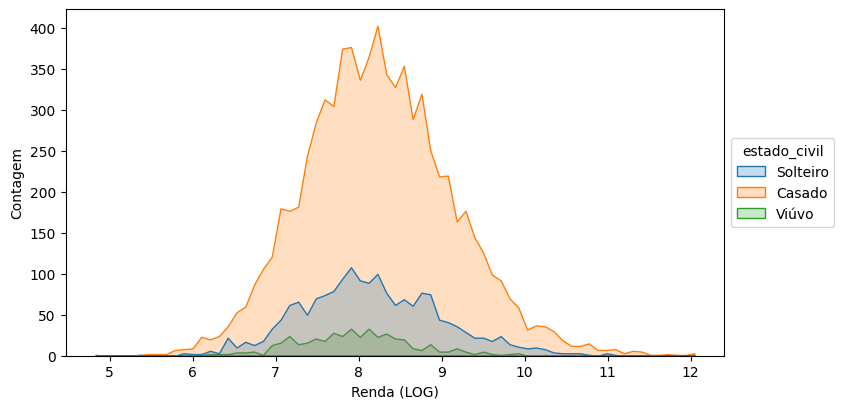

In [74]:
grafico_histplot(ec, 'estado_civil')

O método anova possui um p-value para essa variável inferior a 5%, mas existe uma grande diferença amostral entre os grupos, afetando a precisão dos resultados do ANOVA

Podemos concluir que `estado_civil` não é uma variável relevante para a análise da renda.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="RendaXTpEmp"></a>
                Renda x Tempo Emprego
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

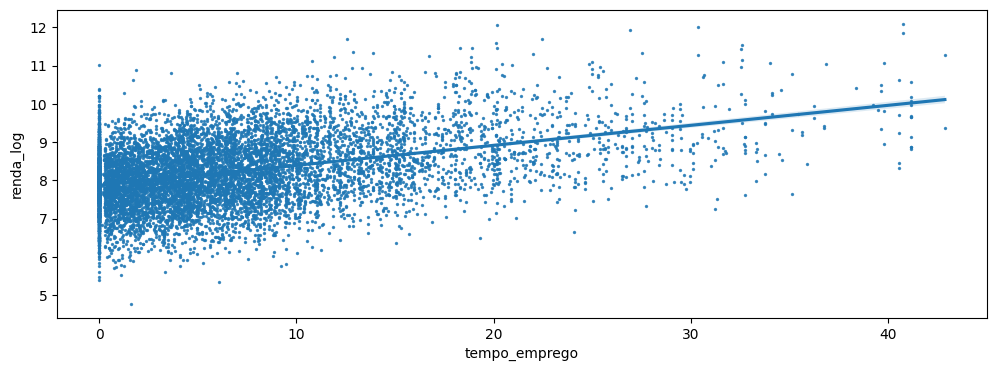

In [75]:
plt.rc('figure', figsize=(12, 4))
_ = sns.regplot(data=renda, x="tempo_emprego", y="renda_log", scatter_kws={'s':2})

Podemos verificar que existe correlação entre renda e o tempo no mesmo emprego.

Também podemos ver uma grande concentração de dados no ano 0. Esses são os **pensionistas** e não devem ser considerados na análise o tempo de emprego.

Vamos criar um gráfico de perfis de média por tempo no emprego para avaliar se essa variável é estatisticamente relevante.

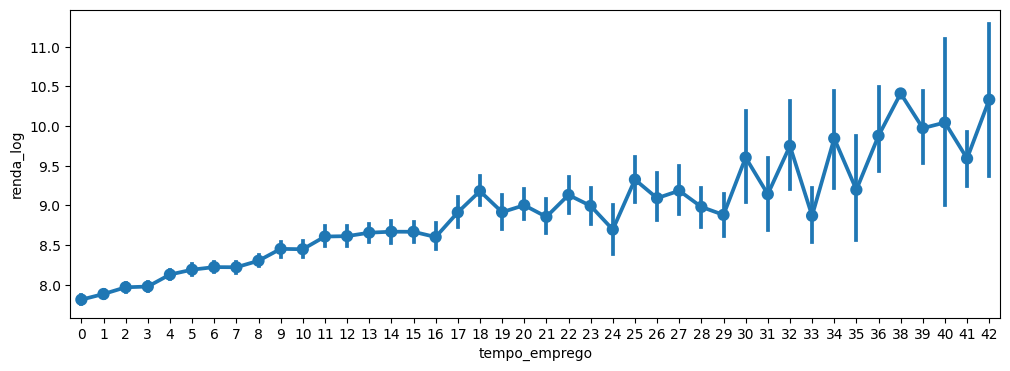

In [76]:
# criando uma cópia do dataframe
df_tempo = renda.copy()

# removendo os registros dos pensionistras
df_tempo = df_tempo[df_tempo['tipo_renda'] != 'Pensionista']

# convertendo o tempo de emprego para inteiro
df_tempo['tempo_emprego'] = df_tempo['tempo_emprego'].astype('int')

# gráfico de perfil de média
plt.rc('figure', figsize=(12, 4))
_ = sns.pointplot(data=df_tempo, x="tempo_emprego", y="renda_log")

Apesar de forte correlação, podemos ver pelo perfil das médias que essa variável não poderia ser usada para a análise da renda no modelo. Por exemplo, a dispersão de todos acima de 30 anos de emprego é maior em relação aqueles de 0 a 16 anos. Outro exemplo poderia ser aqueles que trabalham entre 11 e 15 anos. A média de renda desse grupo tem baixa variação.

Mas e se o tempo de emprego fosse categorizado em intervalos de tempo? Podemos fazer uma simulação transformando o tempo em uma variável categórica para que esse dado seja usado no modelo.

Vamos a simulação abaixo.

In [77]:
def definir_faixa_tempo_emprego(data: pd.DataFrame) -> list:
    # recuperamos a estatística descritiva do tempo de emprego
    info = data.describe()['tempo_emprego']

    # tempo máximo de emprego
    maximo = info['max']

    # cada intervalor criado considera 1 vez o desvio padrão
    desvio = int(info['std'])

    # variável que guarda os intervalos de tempo
    faixas = []

    # lista de strings para cada intervalo de tempo
    faixa_texto = []

    # valor inicial do tempo de emprego
    valor = 0

    while (valor <= maximo):
        # cria uma tupla para o intervalo
        faixas.append((valor, (valor + desvio) -1 ))
        valor = valor + desvio

    ultimo = 0
    for i, intervalo in enumerate(faixas):
        faixa_texto.append(f'{intervalo[0]} - {intervalo[1]}')
        ultimo = intervalo[0]
        
    ultimo = f'{ultimo} ou mais'
    faixa_texto[-1] = ultimo

    def encontrar_intervalo(valor) -> str:
        for i, intervalo in enumerate(faixas):
            if int(valor) >= intervalo[0] and int(valor) <= intervalo[1]:
                return faixa_texto[i]
        return ''

    # cria uma nova coluna no Dataframe com o intervalo
    data['faixa_tempo_emprego'] = data['tempo_emprego'].apply(encontrar_intervalo)
    
    return faixa_texto

In [78]:
faixa_texto = definir_faixa_tempo_emprego(df_tempo)

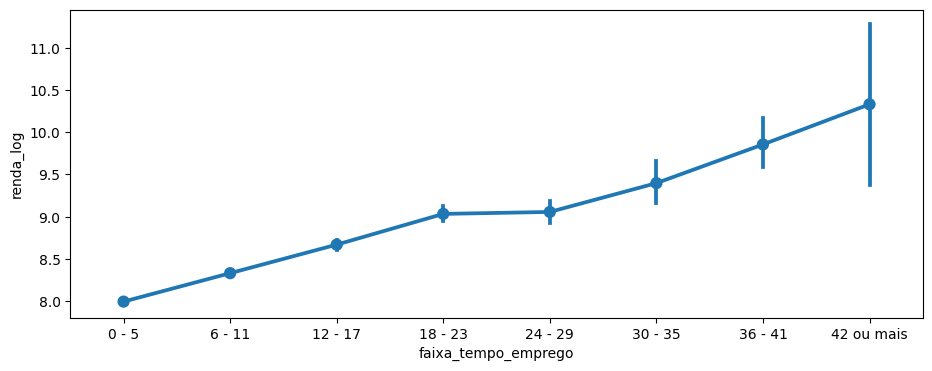

In [79]:
plt.rc('figure', figsize=(11, 4))
_ = sns.pointplot(data=df_tempo, x="faixa_tempo_emprego", y="renda_log", order=faixa_texto)

Com base em 1 vez o desvio padrão do tempo no emprego, foram criados 8 intervalos de tempo. Cada intervalo representa 5 anos.

Podemos observar que esses intervalos mantêm a correlação e progressão com a renda.

Essa variável categórica, que representa o tempo de emprego, pode ser usada como uma variável no nosso modelo de previsão de renda.



In [80]:
teste_anova('faixa_tempo_emprego', df_tempo)

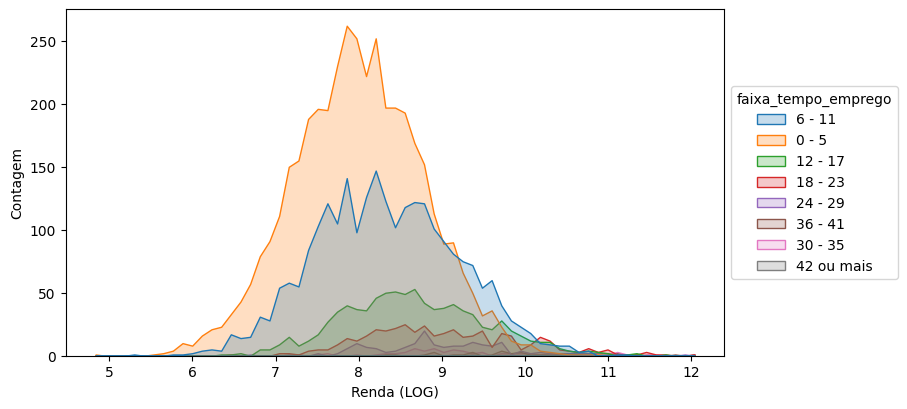

In [81]:
grafico_histplot(df_tempo, 'faixa_tempo_emprego')

Analisando o gráfico do perfil de médias e o histograma, com base na faixa de tempo de emprego, podemos verificar que existem diferenças entre os grupos.

Podemos concluir que <u>o tempo de emprego classificado por intervalos</u> pode ser criado e utilizado como uma variável relevante para a análise da renda.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="RendaXIdTpEmp"></a>
                Renda x Idade x Tempo Emprego
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

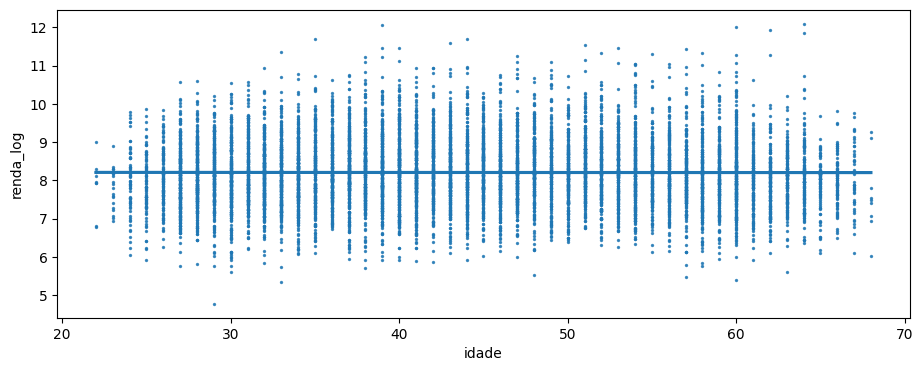

In [82]:
plt.rc('figure', figsize=(11, 4))
_ = sns.regplot(data=renda, x="idade", y="renda_log", scatter_kws={'s':2})

Podemos observar que com relação da idade, a reta de regressão linear passa exatamente pelo meio da amostra e está totalmente na horizontal. Inicialmente, isso poderia indicar que não há uma correlação significativa entre as variáveis.

Mas e se a idade possui alguma relação com alguma outra variável que relevante para a análise da renda? Tempo de emprego, por exemplo. Será que pessoas com mais idade passam mais tempo no mesmo emprego? Vamos analisar abaixo essa possível relação.

In [83]:
# função para criar o gráfico de idade X tempo_emprego X renda
def grafico_idade_emprego(tipo: str) -> None:
    df_tipo = renda[renda['tipo_renda'] == tipo]
    plt.rc('figure', figsize=(11, 3))
    ax = sns.lineplot(data=df_tipo, x="idade", y="tempo_emprego", errorbar=None)
    ax.set_title(f'Tempo emprego x Idade x Renda: {tipo}')
    ax.set_xticks(range(5, 101, 5))
    ax2 = ax.twinx()
    sns.lineplot(ax=ax2, data=df_tipo, x="idade", y="renda_log", errorbar=None, color="orange")

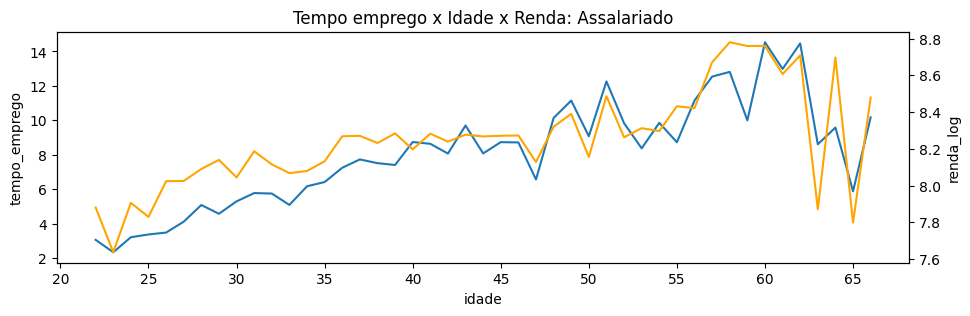

In [84]:
grafico_idade_emprego('Assalariado')

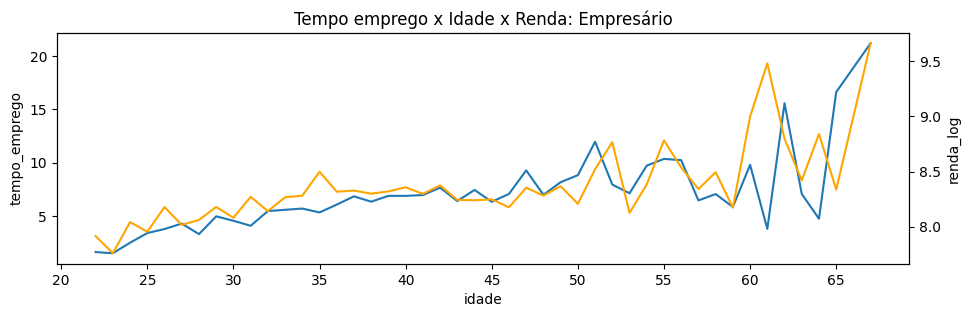

In [85]:
grafico_idade_emprego('Empresário')

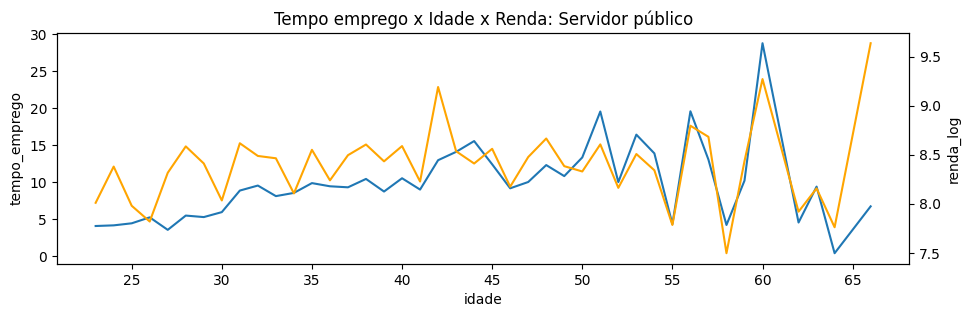

In [86]:
grafico_idade_emprego('Servidor público')

Podemos observar nos 3 gráficos acima que o tempo de permanência no emprego cresce conforme a idade aumenta. Também podemos ver que a renda da pessoa acompanha esse movimento. 

Com exceção ao empresário, vale observar também que ao atingir 60 anos, a renda da pessoa tende a diminuir. Provavelmente devido à proximidade da aposentadoria.

Podemos concluir que a variável <u>idade</u> pode ser utilizada para a análise da renda.

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="etapa2conclu"></a>
                Conclusão
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Ao final da analise da estatística bivariada, podemos concluir que:
- Não são variáveis relevantes para a análise da renda: tipo de residência, educação, idade, quantidade de filhos, quantidade de pessoas na mesma residência e estado civil;
- São variáveis relevantes para a análise da renda: tipo de renda, sexo, posse de veículo e posse de imóvel;
- Com base na variável educação, criaremos a variável `curso_superior`, que vai indicar se o cliente possui ou não curso superior;
- Com base na variável idade, criaremos a variável `faixa_etaria`, que classifica o cliente em jovem, adulto ou idoso;
- A variável tempo de emprego é relevante para a análise da renda mas se for usada como variável categórica por faixa de tempo.

<table style="width: 100%; border-collapse: collapse; margin-bottom: 20px">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h1>
                <a name="etapa3"></a>
                Etapa 3: Preparação dos dados
            </h1>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Realizando a análise exploratória de dados, foi possível verificar algumas inconsistências na base de dados. A limpeza nos dados e o tratamento de inconsistências foram realizadas nas etapas anteriores diretamente na base de dados `renda`, com a intenção de não atrapalharem a análise bivariada das variáveis.

Todos os dados já se encontram em formatos úteis para o modelo e também já temos os dados selecionados adequadamente: tipo de renda, sexo, posse de veículo e posse de imóvel.

Além desses 4 dados, precisamos construir duas novas variáveis que também serão utilizadas: `curso_superior` e `faixa_etaria`.

A construção final da base de dados que será utilizada no modelo será realizada pela função implementada abaixo.

In [87]:
def alterar_variaveis(df: pd.DataFrame) -> pd.DataFrame:
    # classifica aqueles que possuem ou não curso superior
    df['curso_superior'] = np.where(df['educacao'].isin(['Superior completo', 'Pós graduação']), True, False)

    # classificando em jovem, adulto ou idoso
    definir_faixa_etaria(df)

    # definindo as faixa de intervalo de tempo para o tempo de emprego
    definir_faixa_tempo_emprego(df)

    # Pensionistas não possuem uma faixa de tempo de emprego
    # nesse caso a faixa de tempo será 'Pensionista'
    df['faixa_tempo_emprego'] = np.where(df['tipo_renda'] == 'Pensionista', 'Pensionista', df['faixa_tempo_emprego'])

    return df

In [88]:
renda = alterar_variaveis(renda)

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h1>
                <a name="etapa4"></a>
                Etapa 4: Modelagem
            </h1>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="etapa41"></a>
                Seleção do modelo e avaliação dos dados selecionados
            </h3>
        </td>
    </tr>
</table>

O Statsmodels será usado para a construção do modelo. 

A função abaixo será utilizada para auxiliar a avaliação das variáveis que foram selecionadas para o modelo. Seu objetivo é imprimir o resumo do modelo treinado com as variáveis recebidas por parâmetro, contendo o valor do R quadrado e as variáveis com p-value > 0.05, se existir.

In [89]:
'''
A variável dic_contagem abaixo é um dicionário para as colunas categóricas da base.
A chave desse dicionário é o nome da coluna e o valor é o valor da coluna com mais dados na base. Exemplo:

'sexo': 'F',
'tipo_renda': 'Assalariado',
'educacao': 'Secundário',
'estado_civil': 'Casado',
'tipo_residencia': 'Casa',
'faixa_etaria': 'Adulto',
'faixa_tempo_emprego': '0 - 5'
'''
dic_contagem = {}
for nome in renda.select_dtypes(include='object').columns.tolist():
    counts = renda[nome].value_counts()
    dic_contagem[nome] = counts.index[0]

    
# A função abaixo será utilizada para testar diversas variáveis da base de dados no statsmodels.
def testar_variaveis_modelo(variaveis: list):
    # variáveis da base que serão testadas
    param = variaveis.copy()
    
    # se a variável for categórica, aplica um tratamento para a casela de referência
    for index, value in enumerate(param):
        if value in dic_contagem.keys():
            param[index] = f"C({value}, Treatment('{dic_contagem[value]}'))"

    # cria o X/Y de acordo com a string dos parâmetros que serão testados
    texto_params = " + ".join(param)
    y, X = patsy.dmatrices(f'renda_log ~ {texto_params}', data=renda)
    

    reg = sm.OLS(y, X).fit()
    summary = reg.summary()

    # Aqui começa a criar o resumo do teste. Inicialmente lista os parâmetros
    textos = ['<b>Parâmetros do modelo:</b>']
    for value in param:
        textos.append(f'&nbsp; ▪ {value}')
    
    # Adiciona no resumo o R quadrado do teste
    textos.append(f'<br><b>R-squared:</b><br>{reg.rsquared}<br>')
    
    
    tabela = summary.tables[1]
    variaveis_p_valor_alto = []
    
    
    # percorre o sumário do resultado do teste em busca das variáveis com p-value > 0.05
    for i in range(1, len(tabela)):
        variavel = tabela[i][0]
        p_valor = float(str(tabela[i][4]))
        
        if p_valor > 0.05:
            texto = f'{variavel} - <u>P-value</u>: {p_valor}'
            variaveis_p_valor_alto.append(texto)


    # se existe alguma variável com p-value > 0.05, adiciona no resumo do teste
    if len(variaveis_p_valor_alto) > 0:
        textos.append("<font color=red><b>Variáveis com p-valor > 0.05:</b></font>")
        for variavel in variaveis_p_valor_alto:
            textos.append(variavel)
    else:
        textos.append("<font color=blue>Todas as variáveis com p-valor < 0.05</font>")


    # retora o resumo do teste
    return imprimir("<br>".join(textos))

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="1TestVars"></a>
                Primeiro teste: variáveis selecionadas
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

O primeiro teste será realizado com as variáveis selecionadas com base análise estatística bivariada.

In [90]:
testar_variaveis_modelo([
    "sexo",
    "faixa_tempo_emprego",
    "tipo_renda",
    "faixa_etaria",
    "curso_superior",
    'posse_de_veiculo',
    'posse_de_imovel',
])

O modelo treinado com as variáveis selecionadas possui um R<sup>2</sup> de 33% e nenhuma variável com p-value menor que 0.05.

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="TestTempEducId"></a>
                Teste com tempo_emprego, educacao e idade
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Nesse teste as variáveis `faixa_tempo_emprego` e `faixa_etaria` foram substituídas por `tempo_emprego` e `idade`, respectivamente. Também foi incluida a variável `educacao`

In [91]:
testar_variaveis_modelo([
    "sexo",
    "tempo_emprego",
    "tipo_renda",
    "educacao",
    "idade",
    'posse_de_veiculo',
    'posse_de_imovel',
])

Esse teste possui um R<sup>2</sup> de 34%, um pouco superior ao modelo com os dados selecionados, porém a variável `educacao` possui valores com p-value > 0.05

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="TestTempEducFil"></a>
                Teste com tempo_emprego, educacao e qtd_filhos
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

In [92]:
testar_variaveis_modelo([
    "sexo",
    "tempo_emprego",
    "tipo_renda",
    "educacao",
    "qtd_filhos",
    'posse_de_veiculo',
    'posse_de_imovel',
])

Esse teste possui um R<sup>2</sup> de 34%, um pouco superior ao modelo com os dados selecionados, porém as variáveis `educacao`, `posse_de_veiculo` e `qtd_filhos` possuem p-value > 0.05

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="TestQtPessEducFil"></a>
                Teste com qt_pessoas_residencia, educacao e qtd_filhos
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

In [93]:
testar_variaveis_modelo([
    "sexo",
    "qt_pessoas_residencia",
    "tipo_renda",
    "educacao",
    "qtd_filhos",
    'posse_de_veiculo',
    'posse_de_imovel',
])

Esse teste possui um R<sup>2</sup> de 16%, muito inferior ao modelo com os dados selecionados e com várias variáveis com p-value > 0.05

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="TestEstCivilEducTemp"></a>
                Teste com estado_civil, educacao e tempo_emprego
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

In [94]:
testar_variaveis_modelo([
    "sexo",
    "estado_civil",
    "tipo_renda",
    "educacao",
    "tempo_emprego",
    'posse_de_veiculo',
    'posse_de_imovel',
])

Esse teste possui um R<sup>2</sup> de 34%, porém as variáveis `estado_civil`, `educacao` e `posse_de_veiculo` possuem p-value > 0.05

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="TestEstCivilTemp"></a>
                Teste com estado_civil e tempo_emprego
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

In [95]:
testar_variaveis_modelo([
    "sexo",
    "estado_civil",
    "tipo_renda",
    "tempo_emprego",
    'posse_de_veiculo',
    'posse_de_imovel',
])

Esse teste possui um R<sup>2</sup> de 33%, porém `estado_civil` possui p-value > 0.05

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="TestDadosSelQtPess"></a>
                Teste com dados selecionados mais qt_pessoas_residencia
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>


Teste realizados com as mesmas variáveis que foram selecionadas, incluindo a variável `qt_pessoas_residencia`

In [96]:
testar_variaveis_modelo([
    "sexo",
    "faixa_tempo_emprego",
    "tipo_renda",
    "faixa_etaria",
    "curso_superior",
    'posse_de_veiculo',
    'posse_de_imovel',
    'qt_pessoas_residencia',
])

Esse teste possui um R<sup>2</sup> de 33%, porém `qt_pessoas_residencia` possui p-value > 0.05

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="ConclusãoVars"></a>
                Conclusão dos testes das variáveis
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Através dos testes realizados anteriormente, podemos concluir que as variáveis que selecionadas para o modelo são as adequadas entre todas, através da análise estatística bivariada.

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="AvalModeloTeste"></a>
                Avaliação do modelo e desenho do teste
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Nessa etapa o modelo será treinado com as variáveis que foram selecionadas e será testado com 30% dos dados da base.

In [97]:
param = [
    "C(sexo, Treatment('F'))",
    "C(faixa_tempo_emprego, Treatment('0 - 5'))",
    "C(tipo_renda, Treatment('Assalariado'))",
    "C(faixa_etaria, Treatment('Adulto'))",
    "curso_superior",
    "posse_de_veiculo",
    "posse_de_imovel",
]

# cria a string com os parâmetros para a construção do modelo
texto_params = " + ".join(param)
y, X = patsy.dmatrices(f'renda_log ~ {texto_params}', data=renda, return_type='dataframe')

# separa os dados de treino e teste. 30% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# construção do modelo
modelo = sm.OLS(y_train, X_train)
reg = modelo.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     213.9
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:34:51   Log-Likelihood:                -7454.1
No. Observations:                6881   AIC:                         1.494e+04
Df Residuals:                    6864   BIC:                         1.506e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       7.4987      0.023    319.715      0.000       7.453       7.545
C(sexo, Treatment('F'))[T.M]                                    0.7749      0.020     38.315      0.000       0.735       0.815
C(faixa_tempo_emprego, Treatment('0 - 5'))[T.12 - 17]           0.7560      0.033     22.941      0.000       0.691       0.821
C(faixa_tempo_emprego, Treatment('0 - 5'))[T.18 - 23]           1.1579      0.045     25.806      0.000       1.070       1.246
C(faixa_tempo_emprego, Treatment('0 - 5'))[T.24 - 29]           1.3131      0.067     19.706      0.000       1.182       1.444
C(faixa_tempo_emprego, Treatment('0 - 5'))[T.30 - 35]           1.7006      0.097     17.471      0.000       1.510       1.891
C(faixa_tempo_emprego, Treatment('0 - 5'))[T.36 - 41]           1.7719      0.153     11.589      0.000       1.472       2.072
C(faixa_tempo_emprego, Treatment('0 - 5'))[T.42 ou mais]        2.3817      0.511      4.663      0.000       1.380       3.383
C(faixa_tempo_emprego, Treatment('0 - 5'))[T.6 - 11]            0.3665      0.022     16.726      0.000       0.324       0.409
C(faixa_tempo_emprego, Treatment('0 - 5'))[T.Pensionista]       0.0616      0.009      6.818      0.000       0.044       0.079
C(tipo_renda, Treatment('Assalariado'))[T.Empresário]           0.1509      0.022      6.885      0.000       0.108       0.194
C(tipo_renda, Treatment('Assalariado'))[T.Pensionista]          0.0616      0.009      6.818      0.000       0.044       0.079
C(tipo_renda, Treatment('Assalariado'))[T.Servidor público]     0.0854      0.033      2.624      0.009       0.022       0.149
C(faixa_etaria, Treatment('Adulto'))[T.Idoso]                   0.1960      0.065      2.994      0.003       0.068       0.324
C(faixa_etaria, Treatment('Adulto'))[T.Jovem]                  -0.0858      0.029     -2.989      0.003      -0.142      -0.030
C(faixa_etaria, Treatment('Adulto'))[T.Pensionista]             0.0616      0.009      6.818      0.000       0.044       0.079
curso_superior[T.True]                                          0.0953      0.018      5.297      0.000       0.060       0.131
posse_de_veiculo[T.True]                                        0.0494      0.019      2.580      0.010       0.012       0.087
posse_de_imovel[T.True]                                         0.1054      0.019      5.670      0.000       0.069       0.142
==============================================================================
Omnibus:                        2.319   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                2.379
Skew:                         

In [98]:
# valores preditos
y_pred = reg.predict(X_test)

# Calcule o erro médio quadrático (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcule o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)

texto = f'Erro médio quadrático (MSE): {mse:.2f}'
texto = texto + f'<br>Coeficiente de determinação (R²): {r2:.2f}'

imprimir(texto)

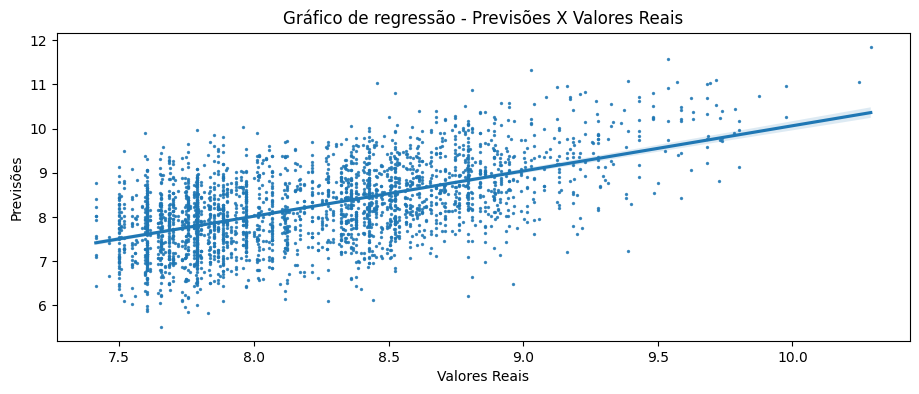

In [141]:
plt.rc('figure', figsize=(11, 4))
sns.regplot(y=y_test, x=y_pred, scatter_kws={'s':2})
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
_ = plt.title('Gráfico de regressão - Previsões X Valores Reais')

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h2>
                <a name="RodandoModelo"></a>
                Rodando o modelo
            </h2>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Nessa etapa a função abaixo será criada para formatar os dados de entrada para o método `predict` do modelo que foi treinado. depois será feito alguns testes com dados aleatórios para previsão da renda.

In [140]:
'''
A função abaixo recebe um dicionário de dados com os parâmetros e dados que queremos aplicar no modelo 
para a previsão da renda. Essa função formata esses dados de forma adequada para uso no modelo que foi treinado.
O valor retornado pela função seria a renda rela do indivíduo referente aos dados que estamos avaliando.
'''
def previsao_renda(dados: dict) -> float:
    sexo = 1. if dados['sexo'] == 'F' else 0.
    posse_de_veiculo = 1. if dados['posse_de_veiculo'] == True else 0.
    posse_de_imovel = 1. if dados['posse_de_imovel'] == True else 0.
    
    faixa_tempo_emprego_6_11 = 0.
    faixa_tempo_emprego_12_17 = 0.
    faixa_tempo_emprego_18_23 = 0.
    faixa_tempo_emprego_24_29 = 0.
    faixa_tempo_emprego_30_35 = 0.
    faixa_tempo_emprego_36_41 = 0.
    faixa_tempo_emprego_42mais = 0.
    faixa_tempo_emprego_pensionista = 0.
    
    if dados['tipo_renda'] == 'Pensionista':
        faixa_tempo_emprego_pensionista = 1.
    elif (dados['tempo_emprego'] >= 6) & (dados['tempo_emprego'] <= 12):
        faixa_tempo_emprego_6_11 = 1.
    elif (dados['tempo_emprego'] >= 12) & (dados['tempo_emprego'] <= 17):
        faixa_tempo_emprego_12_17 = 1.
    elif (dados['tempo_emprego'] >= 18) & (dados['tempo_emprego'] <= 23):
        faixa_tempo_emprego_18_23 = 1.
    elif (dados['tempo_emprego'] >= 24) & (dados['tempo_emprego'] <= 29):
        faixa_tempo_emprego_24_29 = 1.
    elif (dados['tempo_emprego'] >= 30) & (dados['tempo_emprego'] <= 35):
        faixa_tempo_emprego_30_35 = 1.
    elif (dados['tempo_emprego'] >= 36) & (dados['tempo_emprego'] <= 41):
        faixa_tempo_emprego_36_41 = 1.
    elif (dados['tempo_emprego'] >= 42):
        faixa_tempo_emprego_42mais = 1.

    tipo_renda_empresario = 0.
    tipo_renda_pensionista = 0.
    tipo_renda_servidorpublico = 0.
    
    if dados['tipo_renda'] == 'Pensionista':
        tipo_renda_pensionista = 1.
    elif dados['tipo_renda'] == 'Empresário':
        tipo_renda_empresario = 1.
    elif dados['tipo_renda'] == 'Servidor público':
        tipo_renda_servidorpublico = 1.
        
    faixa_etaria_Idoso = 0.
    faixa_etaria_Jovem = 0.
    faixa_etaria_Pensionista = 0.
    
    if dados['tipo_renda'] == 'Pensionista':
        faixa_etaria_Pensionista = 1.
    elif dados['idade'] <= 29:
        faixa_etaria_Jovem = 1.
    elif dados['idade'] >= 60:
        faixa_etaria_Idoso = 1.
        
    if (dados['educacao'] == 'Pós graduação') | (dados['educacao'] == 'Superior completo'):
        curso_superior = 1.
    else:
        curso_superior = 0.
    
    params = [
        1.,
        sexo,
        faixa_tempo_emprego_12_17,
        faixa_tempo_emprego_18_23,
        faixa_tempo_emprego_24_29,
        faixa_tempo_emprego_30_35,
        faixa_tempo_emprego_36_41,
        faixa_tempo_emprego_42mais,
        faixa_tempo_emprego_6_11,
        faixa_tempo_emprego_pensionista,
        tipo_renda_empresario,
        tipo_renda_pensionista,
        tipo_renda_servidorpublico,
        faixa_etaria_Idoso,
        faixa_etaria_Jovem,
        faixa_etaria_Pensionista,
        curso_superior,
        posse_de_veiculo,
        posse_de_imovel
    ]
    
    valor = reg.predict(params)[0]
    return np.exp(valor)


'''
A função abaixo recebe um dicionário de dados com os parâmetros e dados que queremos aplicar no modelo 
para a previsão da renda e cria um texto formato para a saída com a descrição dos dados e a renda.
'''
def previsao(dados: dict):
    resposta = [
        f'Sexo: {"Feminino" if dados["sexo"] == "F" else "Masculino"}',
        f"Educação: {dados['educacao']}",
        f"Idade: {dados['idade']}",
        f"Tipo de renda: {dados['tipo_renda']}",
        f"Tempo de emprego: {dados['tempo_emprego']} anos",
        f"Possui veículo: {'SIM' if dados['posse_de_veiculo'] == True else 'Não'}",
        f"Possui imóvel: {'SIM' if dados['posse_de_imovel'] == True else 'Não'}",
        '',
        f"<b>Previsão de renda: </b> {previsao_renda(dados):0.2f}"
    ]
    
    return imprimir('<br>'.join(resposta))

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="TestesDadosRand"></a>
                Testes com dados aleatórios
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

Abaixo será feito 3 testes diferentes com dados aleatórios sobre o modelo que foi treinado.

In [136]:
previsao({
    'sexo': 'F',
    'posse_de_veiculo': False,
    'posse_de_imovel': False,
    'educacao': 'Superior completo',
    'tipo_renda': 'Servidor público',
    'idade': 20,
    'tempo_emprego': 2,
})

In [137]:
previsao({
    'sexo': 'M',
    'posse_de_veiculo': True,
    'posse_de_imovel': True,
    'educacao': 'Primário',
    'tipo_renda': 'Empresário',
    'idade': 35,
    'tempo_emprego': 10,
})

In [138]:
previsao({
    'sexo': 'M',
    'posse_de_veiculo': False,
    'posse_de_imovel': True,
    'educacao': 'Secundário',
    'tipo_renda': 'Assalariado',
    'idade': 35,
    'tempo_emprego': 30,
})

<br>
<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h3>
                <a name="GravModeloTrein"></a>
                Gravando o modelo treinado
            </h3>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

O modelo treinado acima será gravado em um arquivo para poder ser usado em outros projetos, para não haver a necessidade de treinado novamente.

In [103]:
with open('./output/modelo.pkl', 'wb') as arquivo:
    pickle.dump(reg, arquivo)

<br>
<table style="width: 100%; border-collapse: collapse; margin-bottom: 20px">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h1>
                <a name="etapa5"></a>
                Etapa 5: Avaliação dos resultados
            </h1>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

O modelo apresentou um erro médio quadrático (MSE) de 0.54 e um coeficiente de determinação (R²) de 0.33.

Com esses resultados, não podemos considerar um bom modelo, pois indica que os valores previstos estão distantes dos valores reais e que o modelo explica apenas uma pequena parte da variabilidade dos dados.

Acredito que isso se deve a construção da base de dados utilizada no modelo e suas inconsistências. Aqui podemos listar alguns fatos encontrados na análise exploratória:

1. Assumindo a coluna `id_cliente` como identificador único, encontramos vários clientes com 2 ou mais registros, todos iguais, diferenciando apenas pela variável `educacao`, [como foi reportado aqui.](#VarEducacao)

2. Para os registros com o `tipo_renda` igual a Bolsista, todos os valores das outras colunas eram iguais, [como foi reportado aqui.](#VarTipoRend)

3. Para os registros com `tipo_renda` igual a Assalariado, aqueles com `educacao` igual a Primário tinham renda igual ou superior aqueles com `educacao` igual a Superior completo ou Pós graduação. Não foi possível encontrar algo que explicasse essa condição.

<br>
<table style="width: 100%; border-collapse: collapse; margin-bottom: 20px">
    <tr>
        <td style="width: 60%; padding: 0; background-color: white; text-align:left">
            <h1>
                <a name="implatacao"></a>
                Etapa 6: Implantação
            </h1>
        </td>
        <td style="text-align: right; padding-right: 0px;  background-color: white;">
            <a href="#Contents">Índice</a>
        </td>
    </tr>
</table>

O modelo desenvolvido foi implementado em um aplicativo Web desenvolvido em Streamlit. O código desse aplicativo está na pasta `streamlit` desse projeto junto com um vídeo mostrando o funcionamento do modelo integrado com a interface do usuário.